# Datenanalyse MediaPipe und DeepMotion

## DeepMotion Nicht Kompensiert 03

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
# Read the data to a pandas data frame
df_deepM_03 = pd.read_csv('../Data/KeypointsBereinigtNichtKompensiert_03.csv', sep=',', encoding='utf-8')
df_deepM_03.head(5)

path  frame  compensation   
0  /Users/salomekoller/Library/CloudStorage/OneDr...      1             0  \
1  /Users/salomekoller/Library/CloudStorage/OneDr...      2             0   
2  /Users/salomekoller/Library/CloudStorage/OneDr...      3             0   
3  /Users/salomekoller/Library/CloudStorage/OneDr...      4             0   
4  /Users/salomekoller/Library/CloudStorage/OneDr...      5             0   

        x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
0  993.7168  312.4525  60.97508    0    0    0    0  ...     0     0     0  \
1  993.4863  312.7902  64.01797    0    0    0    0  ...     0     0     0   
2  993.1717  312.9131  65.71051    0    0    0    0  ...     0     0     0   
3  992.8257  312.9755  66.99379    0    0    0    0  ...     0     0     0   
4  992.4915  312.9540  67.98187    0    0    0    0  ...     0     0     0   

   z_30      x_31      y_31      z_31      x_32      y_32      z_32  
0     0  1075.140  1099.840 -32.73212  993.1956  1099.787 -31.44870  
1     0  1075.305  1099.822 -33.42075  993.3979  1099.827 -31.67138  
2     0  1075.441  1099.776 -33.55896  993.5262  1099.802 -31.84067  
3     0  1075.445  1099.767 -33.14879  993.6022  1099.782 -31.63464  
4     0  1075.081  1099.858 -31.59972  993.2418  1099.834 -30.32690  

[5 rows x 102 columns]

### Analysis

In [4]:
# Dimension (rows, columns)
print('Dimension:', df_deepM_03.shape)

# Number of rows
print('Number of rows:', df_deepM_03.shape[0])

# Number of columns
print('Number of columns:', df_deepM_03.shape[1])

Dimension: (937, 102)
Number of rows: 937
Number of columns: 102


### Splitting Frames

In [5]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM_03.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [182, 373, 565, 740, 937]


In [6]:
# Split DataFrame into segments based on frame changes
dfs = []
start = 0
for end in frames_until_reset:
    dfs.append(df_deepM_03.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfs))
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 5
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5


path  frame  compensation   
740  /Users/salomekoller/Library/CloudStorage/OneDr...      1             0  \
741  /Users/salomekoller/Library/CloudStorage/OneDr...      2             0   
742  /Users/salomekoller/Library/CloudStorage/OneDr...      3             0   
743  /Users/salomekoller/Library/CloudStorage/OneDr...      4             0   
744  /Users/salomekoller/Library/CloudStorage/OneDr...      5             0   

          x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
740  1134.672  346.9265 -275.1646    0    0    0    0  ...     0     0     0  \
741  1135.075  349.8949 -274.6061    0    0    0    0  ...     0     0     0   
742  1136.018  350.9499 -274.0605    0    0    0    0  ...     0     0     0   
743  1136.345  350.7992 -273.4016    0    0    0    0  ...     0     0     0   
744  1136.831  350.1884 -272.6129    0    0    0    0  ...     0     0     0   

     z_30      x_31      y_31      z_31      x_32      y_32      z_32  
740     0  1222.332  1134.658 -355.9951  1140.464  1136.050 -354.9270  
741     0  1222.226  1137.691 -356.0463  1140.323  1138.782 -357.3823  
742     0  1221.998  1138.853 -356.4099  1140.052  1139.398 -356.6944  
743     0  1222.286  1138.724 -356.3895  1140.349  1139.131 -357.8157  
744     0  1222.249  1138.158 -356.4661  1140.347  1138.291 -358.8811  

[5 rows x 102 columns]

### Rechte Handbewegung Nicht Kompensiert 03

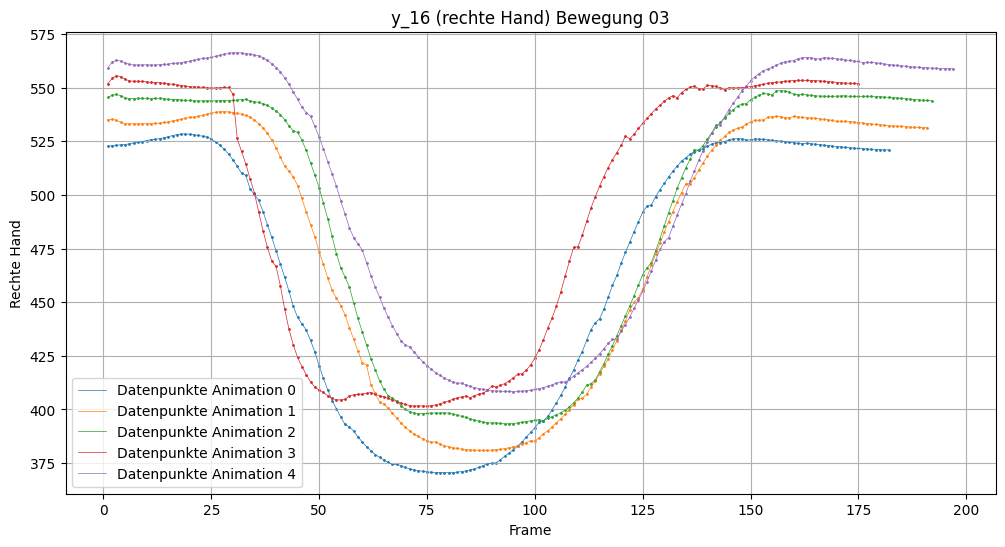

In [113]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')


plt.title("y_16 (rechte Hand) Bewegung 03")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(loc='best')

plt.show()

### Berechnung des Mean

In [8]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means03 = []

mean_values_03 = df_deepM_03[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means03.append(mean_values_03)
    
print(mean_values_03)

              x_0        y_0         z_0  x_1  y_1  z_1  x_2  y_2  z_2  x_3   
frame                                                                         
1      1059.71036  330.72536 -110.492426  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
2      1060.57326  332.25950 -110.279124  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1061.70534  332.64198 -109.933334  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1062.40874  332.34532 -109.530294  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      1063.34450  331.80260 -109.090004  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...        ...         ...  ...  ...  ...  ...  ...  ...  ...   
193    1148.11800  351.58490 -238.039600  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194    1148.10600  351.50500 -237.964800  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195    1148.09400  351.43990 -237.912000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196    1148.08600  351.39890 -237.905300  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
197    1148.08400  351.38820 -237.902700  0.0  0.0  

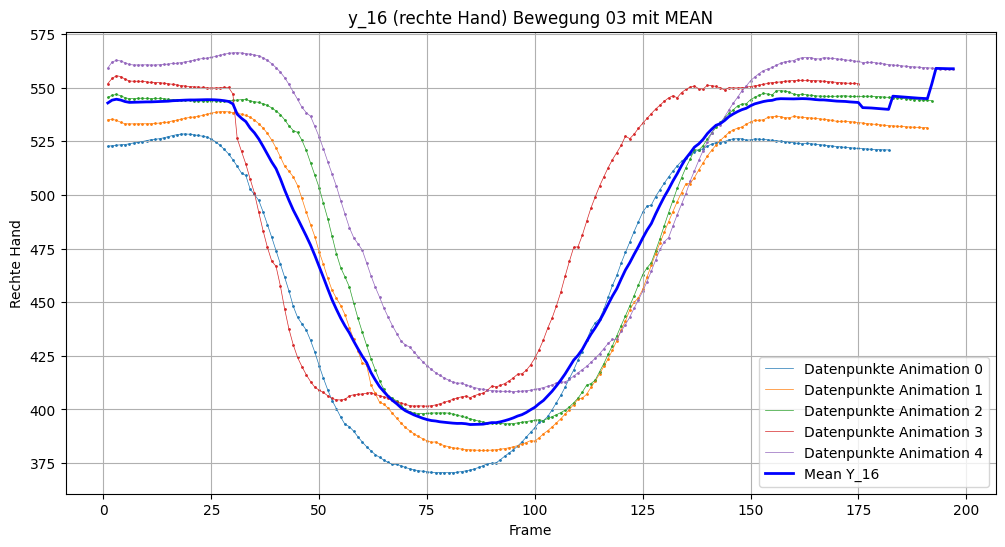

In [112]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

# Plot the mean values per frame
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung 03 mit MEAN")
plt.xlabel("Frame")
plt.legend(loc='best')
plt.ylabel("Rechte Hand")
plt.grid(True)

plt.show()


## DeepMotion Kompensiert 01

In [10]:
# Read the data to a pandas data frame
df_deepM01 = pd.read_csv('../Data/KeypointsBereinigtKompensiert_01.csv', sep=',', encoding='utf-8')
df_deepM01.head(5)

path  frame  compensation   
0  /Users/salomekoller/Library/CloudStorage/OneDr...      1             1  \
1  /Users/salomekoller/Library/CloudStorage/OneDr...      2             1   
2  /Users/salomekoller/Library/CloudStorage/OneDr...      3             1   
3  /Users/salomekoller/Library/CloudStorage/OneDr...      4             1   
4  /Users/salomekoller/Library/CloudStorage/OneDr...      5             1   

        x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
0  1007.957  310.4770  48.49379    0    0    0    0  ...     0     0     0  \
1  1009.866  310.3577  46.83622    0    0    0    0  ...     0     0     0   
2  1010.789  310.2786  45.84492    0    0    0    0  ...     0     0     0   
3  1011.705  310.2040  44.86193    0    0    0    0  ...     0     0     0   
4  1013.273  310.1202  43.07705    0    0    0    0  ...     0     0     0   

   z_30      x_31      y_31      z_31      x_32      y_32      z_32  
0     0  1072.200  1100.625 -47.00967  990.2646  1100.683 -46.87774  
1     0  1072.243  1100.843 -47.14393  990.2909  1100.901 -47.10284  
2     0  1072.243  1100.958 -46.99820  990.3058  1101.013 -47.12606  
3     0  1072.248  1101.064 -46.89816  990.3204  1101.111 -47.27299  
4     0  1072.656  1101.187 -47.29828  990.7258  1101.205 -48.28540  

[5 rows x 102 columns]

### Analysis

In [11]:
# Dimension (rows, columns)
print('Dimension:', df_deepM01.shape)

# Number of rows
print('Number of rows:', df_deepM01.shape[0])

# Number of columns
print('Number of columns:', df_deepM01.shape[1])


Dimension: (1096, 102)
Number of rows: 1096
Number of columns: 102


### Splitting Frames

In [12]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM01.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [210, 431, 652, 873, 1096]


In [13]:
# Split DataFrame into segments based on frame changes
dfsKomp01 = []
start = 0
for end in frames_until_reset:
    dfsKomp01.append(df_deepM01.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfsKomp01))
for i, df in enumerate(dfsKomp01):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 5
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5


path  frame  compensation   
873  /Users/salomekoller/Library/CloudStorage/OneDr...      1             1  \
874  /Users/salomekoller/Library/CloudStorage/OneDr...      2             1   
875  /Users/salomekoller/Library/CloudStorage/OneDr...      3             1   
876  /Users/salomekoller/Library/CloudStorage/OneDr...      4             1   
877  /Users/salomekoller/Library/CloudStorage/OneDr...      5             1   

          x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
873  1094.928  343.0663 -363.2589    0    0    0    0  ...     0     0     0  \
874  1095.949  343.0834 -363.8603    0    0    0    0  ...     0     0     0   
875  1097.047  343.1154 -365.0294    0    0    0    0  ...     0     0     0   
876  1097.651  343.1132 -365.6901    0    0    0    0  ...     0     0     0   
877  1098.399  343.0958 -366.3971    0    0    0    0  ...     0     0     0   

     z_30      x_31      y_31      z_31      x_32      y_32      z_32  
873     0  1152.970  1130.580 -479.6280  1072.038  1131.653 -467.1464  
874     0  1152.484  1130.871 -479.5944  1071.599  1131.575 -467.0364  
875     0  1152.853  1131.218 -479.7249  1072.015  1131.687 -467.0172  
876     0  1153.033  1131.394 -479.7490  1072.197  1131.779 -466.9315  
877     0  1153.045  1131.596 -479.7104  1072.209  1131.853 -466.7372  

[5 rows x 102 columns]

### Rechte Handbewegung Kompensiert 01

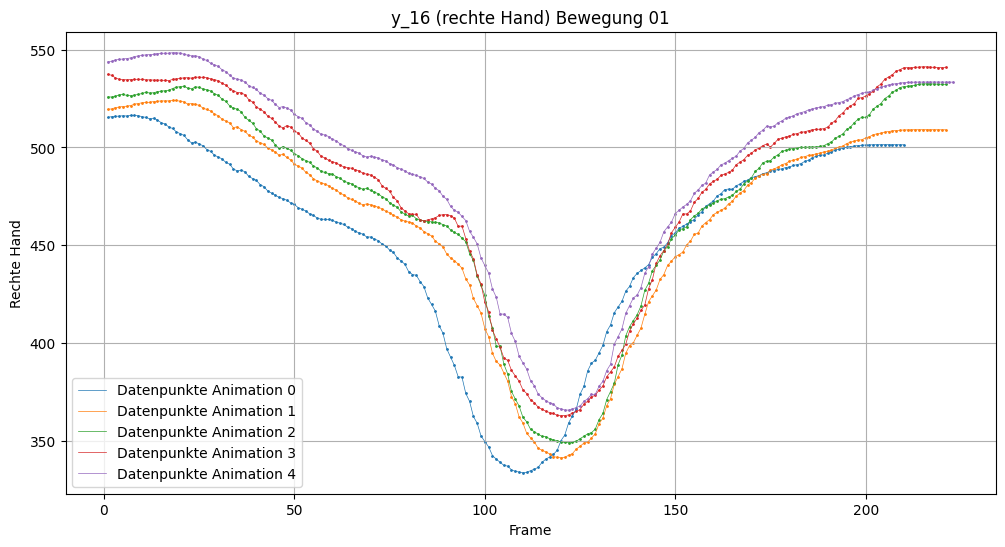

In [118]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs from index 0 to 4
for i, df in enumerate(dfsKomp01[:5]):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("y_16 (rechte Hand) Bewegung 01")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)

# Move the legend outside of the plot
plt.legend(loc='best')

plt.show()


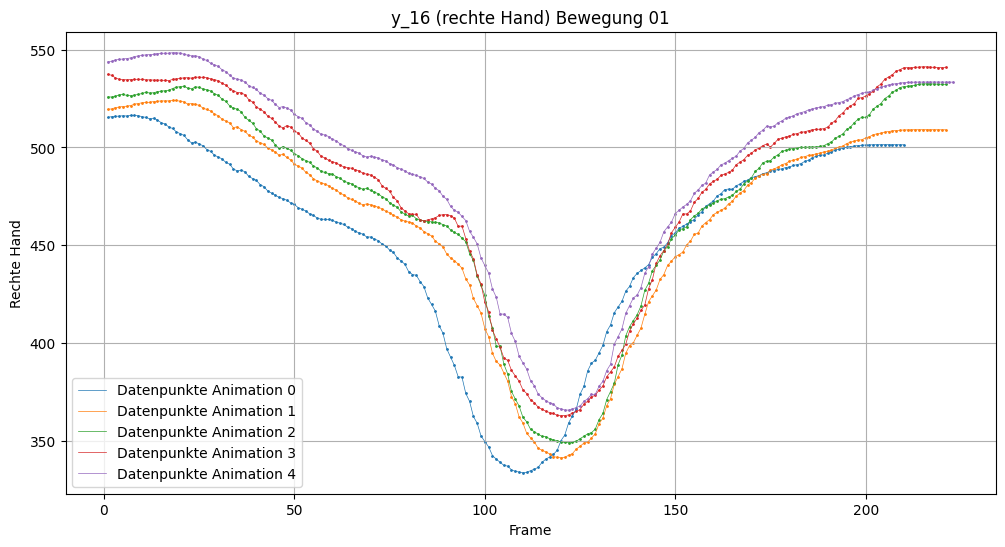

In [119]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("y_16 (rechte Hand) Bewegung 01")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(loc='best')

plt.show()


### Linker Ellbogen

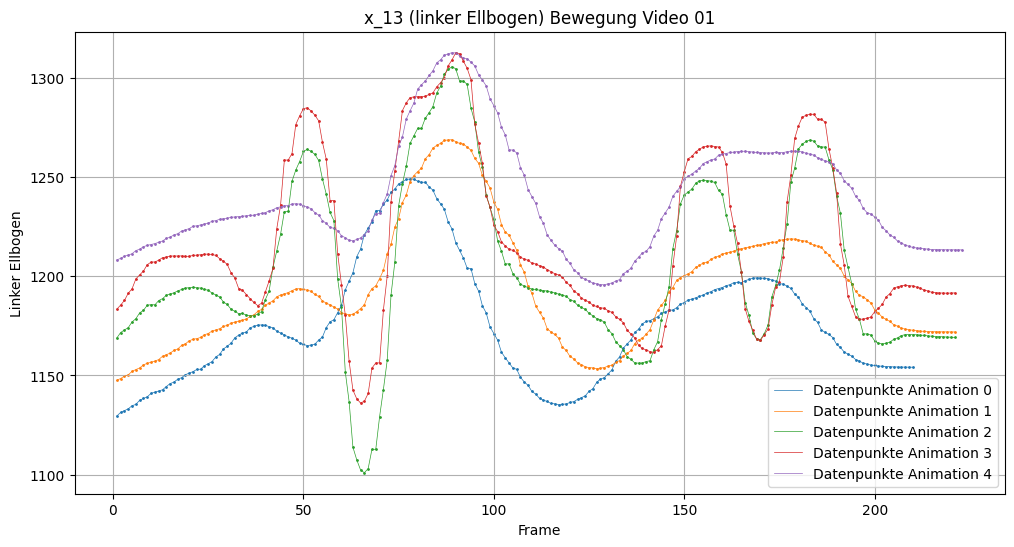

In [109]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("x_13 (linker Ellbogen) Bewegung Video 01")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(loc='best')

plt.show()


### Berechnung des Mean

In [17]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means01 = []

mean_values_01 = df_deepM01[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means01.append(mean_values_01)
    
print(mean_values_01)

              x_0         y_0         z_0  x_1  y_1  z_1  x_2  y_2  z_2  x_3   
frame                                                                          
1      1050.88080  327.091960 -151.937962  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
2      1052.82040  326.949860 -153.955586  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1054.26080  326.621940 -155.729402  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1055.51700  326.254800 -157.655312  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      1057.50240  326.071100 -159.661274  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...         ...         ...  ...  ...  ...  ...  ...  ...  ...   
219    1071.80300  330.439975 -277.238850  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
220    1071.81425  330.365600 -277.251150  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
221    1071.81775  330.333125 -277.239875  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
222    1109.06400  342.401200 -479.623700  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
223    1109.06100  342.401100 -479.63760

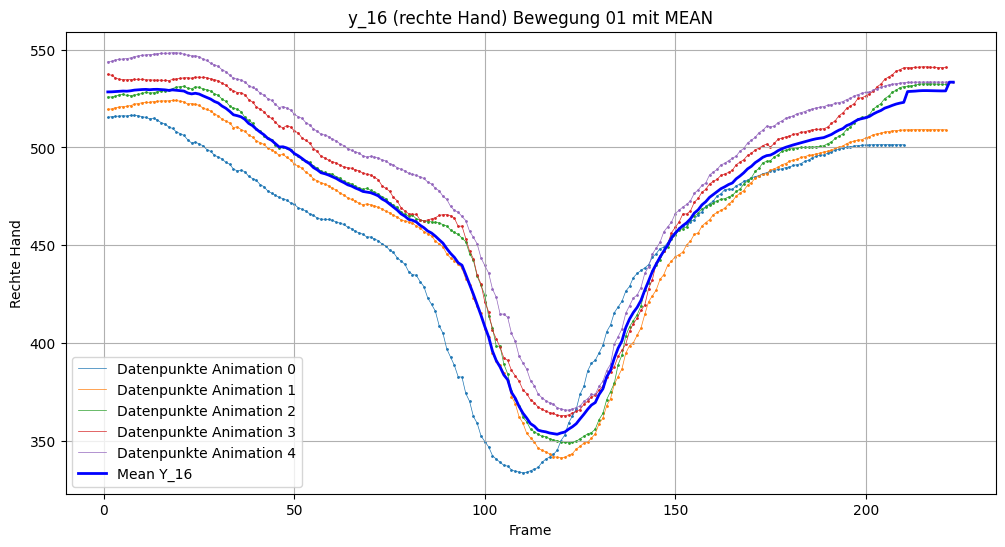

In [121]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

# Plot the mean values per frame
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung 01 mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## DeepMotion Kompensiert 02

In [19]:
# Read the data to a pandas data frame
df_deepM02 = pd.read_csv('../Data/KeypointsBereinigtKompensiert_02.csv', sep=',', encoding='utf-8')
df_deepM02.head(5)

path  frame  compensation   
0  /Users/salomekoller/Library/CloudStorage/OneDr...      1             1  \
1  /Users/salomekoller/Library/CloudStorage/OneDr...      2             1   
2  /Users/salomekoller/Library/CloudStorage/OneDr...      3             1   
3  /Users/salomekoller/Library/CloudStorage/OneDr...      4             1   
4  /Users/salomekoller/Library/CloudStorage/OneDr...      5             1   

        x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
0  1045.738  307.2164  53.49067    0    0    0    0  ...     0     0     0  \
1  1051.104  308.2200  60.64021    0    0    0    0  ...     0     0     0   
2  1053.874  308.7784  64.47417    0    0    0    0  ...     0     0     0   
3  1059.513  309.9936  72.57536    0    0    0    0  ...     0     0     0   
4  1061.705  310.4240  75.85467    0    0    0    0  ...     0     0     0   

   z_30      x_31      y_31      z_31      x_32      y_32      z_32  
0     0  1031.476  1099.686 -0.306662  950.2770  1099.712  11.67775  
1     0  1031.319  1099.439 -1.030100  950.1349  1099.512  11.45676  
2     0  1031.223  1099.288 -1.132612  950.0513  1099.358  11.23634  
3     0  1031.116  1098.955 -0.598068  949.8353  1098.967  10.78002  
4     0  1032.246  1099.001  1.232269  950.9614  1098.980  12.59814  

[5 rows x 102 columns]

### Analysis

In [20]:
# Dimension (rows, columns)
print('Dimension:', df_deepM02.shape)

# Number of rows
print('Number of rows:', df_deepM02.shape[0])

# Number of columns
print('Number of columns:', df_deepM02.shape[1])


Dimension: (1715, 102)
Number of rows: 1715
Number of columns: 102


### Splitting Frames

In [21]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM02.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [337, 676, 1019, 1366, 1715]


In [22]:
# Split DataFrame into segments based on frame changes
dfsKomp02 = []
start = 0
for end in frames_until_reset:
    dfsKomp02.append(df_deepM02.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfsKomp02))
for i, df in enumerate(dfsKomp02):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 5
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5


path  frame  compensation   
1366  /Users/salomekoller/Library/CloudStorage/OneDr...      1             1  \
1367  /Users/salomekoller/Library/CloudStorage/OneDr...      2             1   
1368  /Users/salomekoller/Library/CloudStorage/OneDr...      3             1   
1369  /Users/salomekoller/Library/CloudStorage/OneDr...      4             1   
1370  /Users/salomekoller/Library/CloudStorage/OneDr...      5             1   

           x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
1366  634.5278  334.3423 -220.3428    0    0    0    0  ...     0     0     0  \
1367  637.2392  334.9904 -214.0887    0    0    0    0  ...     0     0     0   
1368  638.6757  335.3635 -210.6026    0    0    0    0  ...     0     0     0   
1369  640.1486  335.7648 -206.9509    0    0    0    0  ...     0     0     0   
1370  643.1901  336.6794 -199.0190    0    0    0    0  ...     0     0     0   

      z_30      x_31      y_31      z_31      x_32      y_32      z_32  
1366     0  644.2543  1128.989 -255.8513  563.2242  1128.984 -268.3650  
1367     0  644.0237  1129.006 -256.1425  562.9718  1128.967 -268.6367  
1368     0  643.9194  1128.981 -256.4549  562.8612  1128.953 -268.8266  
1369     0  643.8287  1128.932 -256.7682  562.7853  1128.932 -268.9525  
1370     0  643.9136  1128.755 -257.6854  562.6180  1128.795 -269.2630  

[5 rows x 102 columns]

### Rechte Handbewegung Kompensiert 02

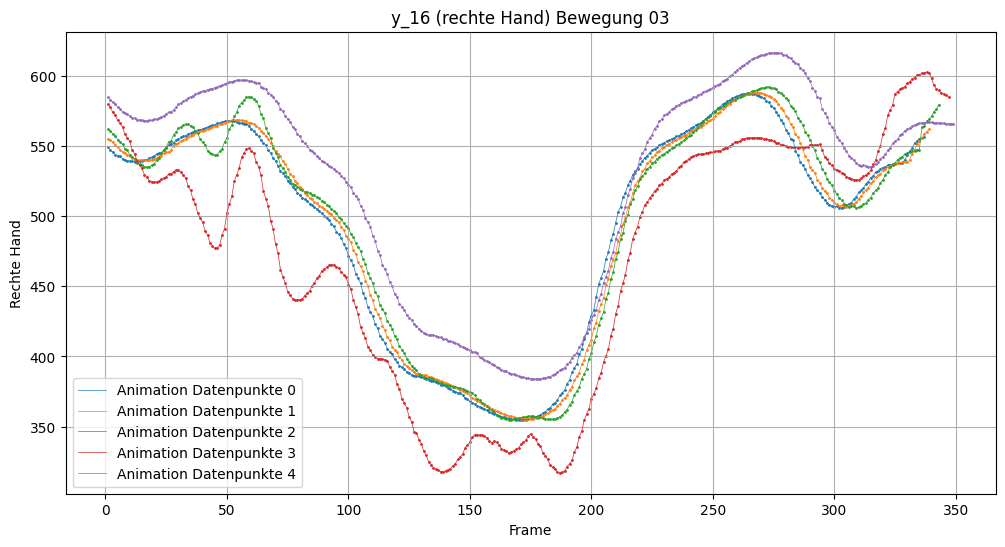

In [122]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp02):

    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Animation Datenpunkte {i}')

plt.title("y_16 (rechte Hand) Bewegung 03")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(loc='best')

plt.show()


### Berechnung des Mean

In [24]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means02 = []

mean_values_02 = df_deepM02[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means02.append(mean_values_02)
    
print(mean_values_02)

             x_0        y_0         z_0  x_1  y_1  z_1  x_2  y_2  z_2  x_3   
frame                                                                        
1      965.22916  315.84352  -49.092624  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
2      967.92724  316.16252  -44.664668  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      970.51934  316.44026  -40.073242  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      973.52232  317.03218  -35.061246  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      976.41322  317.59862  -29.352470  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...          ...        ...         ...  ...  ...  ...  ...  ...  ...  ...   
345    644.89535  336.19025 -291.731100  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
346    644.78460  335.72615 -280.373100  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
347    645.51560  335.32935 -256.874950  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
348    656.48610  336.54520 -273.089900  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
349    656.49950  336.52590 -273.105700  0.0  0.0  0.0  0.0  0.0

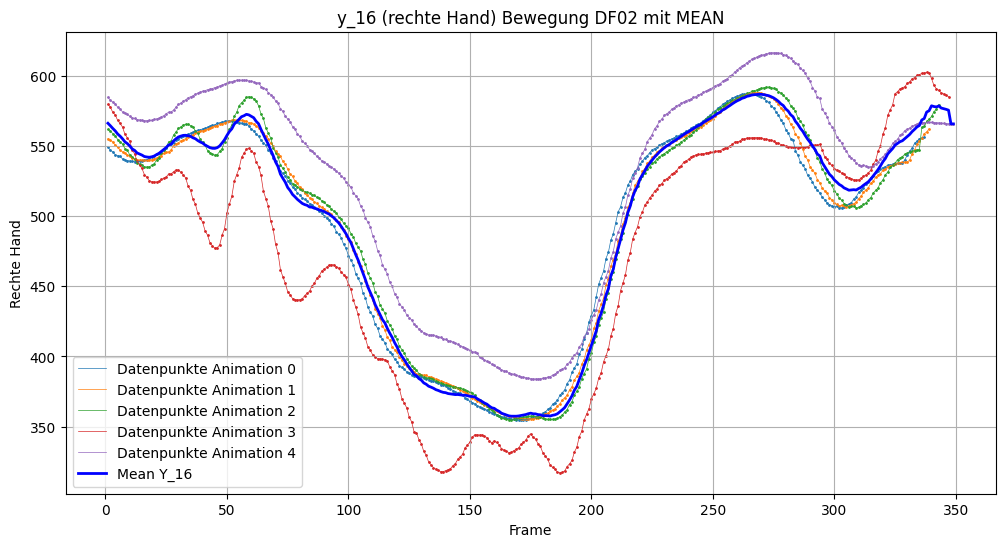

In [123]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp02):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

# Plot the mean values per frame
plt.plot(mean_values_02.index, mean_values_02["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung DF02 mit MEAN" )
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## MediaPipe

In [26]:
# Read the data to a pandas data frame
df_MediaP = pd.read_csv('../Data/samples.csv', sep=',', encoding='utf-8')
df_MediaP.head(5)

path  frame  compensation   
0  bachelorarbeiten/nils/data/videos/samples/drin...      1         False  \
1  bachelorarbeiten/nils/data/videos/samples/drin...      2         False   
2  bachelorarbeiten/nils/data/videos/samples/drin...      3         False   
3  bachelorarbeiten/nils/data/videos/samples/drin...      4         False   
4  bachelorarbeiten/nils/data/videos/samples/drin...      5         False   

         x_0        y_0        z_0         x_1        y_1         z_1   
0  980.27070  321.90277 -637.87220  1001.20710  298.31467 -570.743400  \
1  980.18304  322.42087 -576.33840  1000.78390  298.30203 -499.956900   
2  979.45184  322.89380 -494.81754   999.68500  298.31150 -419.451260   
3  978.80115  323.32083 -288.78116   999.19960  298.38647 -218.547260   
4  978.20070  323.40253 -187.49016   998.74774  298.37817 -120.181145   

          x_2  ...       z_29       x_30        y_30       z_30       x_31   
0  1012.57666  ... -608.88220  868.95660   822.76850 -425.56670  1129.2717  \
1  1011.92860  ... -492.89044  863.16870   950.05493 -247.11397  1088.1865   
2  1010.53424  ... -507.46440  856.91050   964.25590 -143.03336  1066.3529   
3  1009.97040  ... -291.10700  857.01370   984.74225  615.21840  1081.6957   
4  1009.56600  ... -668.87690  862.94824  1023.39290 -705.14440  1054.2860   

        y_31       z_31       x_32        y_32       z_32  
0  765.22095 -821.67800  874.07263   790.29750 -602.04540  
1  831.01380 -737.91990  864.15204   927.50854 -506.88210  
2  924.56305 -768.03930  859.32275   975.18560 -445.09890  
3  965.60770 -583.08700  861.76526  1038.02430  348.65750  
4  956.82416 -876.62854  868.47550  1004.68475 -935.07825  

[5 rows x 102 columns]

In [27]:
# Dimension (rows, columns)
print('Dimension:', df_MediaP.shape)

# Number of rows
print('Number of rows:', df_MediaP.shape[0])

# Number of columns
print('Number of columns:', df_MediaP.shape[1])

Dimension: (623, 102)
Number of rows: 623
Number of columns: 102


### Splitting Frames

In [28]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_MediaP.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [172, 471, 623]


In [29]:
#split DataFrame into two DataFrames at row 6
df_MediaP1 = df_MediaP.iloc[:frames_until_reset[0]]
df_MediaP2 = df_MediaP.iloc[frames_until_reset[0]:frames_until_reset[1]]
df_MediaP3 = df_MediaP.iloc[frames_until_reset[1]:]

In [30]:
df_MediaP1.head(5)

path  frame  compensation   
0  bachelorarbeiten/nils/data/videos/samples/drin...      1         False  \
1  bachelorarbeiten/nils/data/videos/samples/drin...      2         False   
2  bachelorarbeiten/nils/data/videos/samples/drin...      3         False   
3  bachelorarbeiten/nils/data/videos/samples/drin...      4         False   
4  bachelorarbeiten/nils/data/videos/samples/drin...      5         False   

         x_0        y_0        z_0         x_1        y_1         z_1   
0  980.27070  321.90277 -637.87220  1001.20710  298.31467 -570.743400  \
1  980.18304  322.42087 -576.33840  1000.78390  298.30203 -499.956900   
2  979.45184  322.89380 -494.81754   999.68500  298.31150 -419.451260   
3  978.80115  323.32083 -288.78116   999.19960  298.38647 -218.547260   
4  978.20070  323.40253 -187.49016   998.74774  298.37817 -120.181145   

          x_2  ...       z_29       x_30        y_30       z_30       x_31   
0  1012.57666  ... -608.88220  868.95660   822.76850 -425.56670  1129.2717  \
1  1011.92860  ... -492.89044  863.16870   950.05493 -247.11397  1088.1865   
2  1010.53424  ... -507.46440  856.91050   964.25590 -143.03336  1066.3529   
3  1009.97040  ... -291.10700  857.01370   984.74225  615.21840  1081.6957   
4  1009.56600  ... -668.87690  862.94824  1023.39290 -705.14440  1054.2860   

        y_31       z_31       x_32        y_32       z_32  
0  765.22095 -821.67800  874.07263   790.29750 -602.04540  
1  831.01380 -737.91990  864.15204   927.50854 -506.88210  
2  924.56305 -768.03930  859.32275   975.18560 -445.09890  
3  965.60770 -583.08700  861.76526  1038.02430  348.65750  
4  956.82416 -876.62854  868.47550  1004.68475 -935.07825  

[5 rows x 102 columns]

### Vergleich Länge Mediapipe Frame zu DeepMotion Frame

In [31]:
# Dimension (rows, columns)
print('Dimension MediaPipe02:', df_MediaP1.shape)

for i, df in enumerate(dfsKomp01):
    print(f"DataFrame {i+1} Shape:", df.shape)

Dimension MediaPipe02: (172, 102)
DataFrame 1 Shape: (210, 102)
DataFrame 2 Shape: (221, 102)
DataFrame 3 Shape: (221, 102)
DataFrame 4 Shape: (221, 102)
DataFrame 5 Shape: (223, 102)


In [32]:
df_MediaP2.head(5)

path  frame  compensation   
172  bachelorarbeiten/nils/data/videos/samples/03_t...      1         False  \
173  bachelorarbeiten/nils/data/videos/samples/03_t...      2         False   
174  bachelorarbeiten/nils/data/videos/samples/03_t...      3         False   
175  bachelorarbeiten/nils/data/videos/samples/03_t...      4         False   
176  bachelorarbeiten/nils/data/videos/samples/03_t...      5         False   

            x_0        y_0        z_0        x_1        y_1        z_1   
172  1020.42883  267.42682 -428.96457  1037.8142  237.42938 -372.71088  \
173  1020.56540  269.28770 -428.22263  1038.4547  238.76982 -368.28156   
174  1020.62756  271.71250 -461.70862  1038.8955  241.25420 -401.74496   
175  1022.41016  272.85068 -476.24243  1041.0543  242.60153 -415.63477   
176  1023.86664  275.25864 -507.65833  1042.9293  245.13719 -447.91495   

           x_2  ...       z_29       x_30       y_30        z_30       x_31   
172  1048.0687  ... -39.149357  917.36487  1188.9327 -127.484695  1046.4462  \
173  1048.6288  ... -74.517150  920.77030  1186.7421 -170.108500  1042.3124   
174  1049.0034  ... -83.181860  922.71420  1185.2842 -173.734390  1039.2385   
175  1051.0969  ... -83.621735  923.21490  1185.9805 -195.611360  1038.9847   
176  1052.9735  ... -79.818210  923.29630  1184.4579 -183.694350  1039.1173   

          y_31       z_31       x_32       y_32       z_32  
172  1207.4360 -247.56013  865.76776  1265.4349 -387.39243  
173  1201.7700 -304.18120  877.38660  1264.6339 -454.89062  
174  1199.9678 -314.70670  882.44794  1264.2990 -456.52878  
175  1197.8195 -317.67072  882.11700  1265.5605 -490.26190  
176  1193.0076 -306.24997  881.92206  1264.8948 -466.69968  

[5 rows x 102 columns]

### Vergleich Länge Mediapipe Frame zu DeepMotion Frame

In [33]:
# Dimension (rows, columns)
print('Dimension MediaPipe02:', df_MediaP2.shape)

for i, df in enumerate(dfsKomp02):
    print(f"DataFrame {i+1} Shape:", df.shape)

Dimension MediaPipe02: (299, 102)
DataFrame 1 Shape: (337, 102)
DataFrame 2 Shape: (339, 102)
DataFrame 3 Shape: (343, 102)
DataFrame 4 Shape: (347, 102)
DataFrame 5 Shape: (349, 102)


In [34]:
df_MediaP3.head(5)

path  frame  compensation   
471  bachelorarbeiten/nils/data/videos/samples/drin...      1         False  \
472  bachelorarbeiten/nils/data/videos/samples/drin...      2         False   
473  bachelorarbeiten/nils/data/videos/samples/drin...      3         False   
474  bachelorarbeiten/nils/data/videos/samples/drin...      4         False   
475  bachelorarbeiten/nils/data/videos/samples/drin...      5         False   

          x_0        y_0        z_0         x_1        y_1        z_1   
471  996.6416  298.61444 -453.31915  1018.88840  274.45960 -387.38930  \
472  996.0133  298.62660 -754.58150  1018.21130  274.35385 -694.25960   
473  995.8507  298.69916 -745.71230  1018.07020  274.11514 -687.04310   
474  994.7899  298.57990 -626.04724  1017.48914  273.56427 -567.88074   
475  994.8784  298.65143 -598.57060  1017.54694  273.36710 -543.76044   

           x_2  ...       z_29       x_30       y_30        z_30       x_31   
471  1031.5105  ... -308.31436  849.54450  1069.6743   529.55743  1051.9054  \
472  1030.4995  ...  741.46490  860.98500  1292.1052  1220.61710  1071.6205   
473  1030.0964  ...  825.28845  861.23620  1334.4332  1251.12890  1068.9661   
474  1029.4833  ...  957.39610  868.59894  1363.8849  1198.55400  1036.7507   
475  1029.4868  ...  826.02930  870.33350  1364.1888  1117.58540  1038.1260   

          y_31       z_31       x_32       y_32       z_32  
471  1076.8087 -604.22864  820.50180  1113.7295  264.63348  
472  1342.3976  411.37380  849.85290  1333.9728  875.29364  
473  1396.0364  502.05664  860.59450  1375.3201  908.72400  
474  1417.3989  657.56170  883.15875  1404.7780  880.95360  
475  1419.2709  537.53150  885.82117  1405.9742  814.57806  

[5 rows x 102 columns]

### Vergleich Länge Mediapipe Frame zu DeepMotion Frame

In [35]:
# Dimension (rows, columns)
print('Dimension MediaPipe03:', df_MediaP3.shape)

for i, df in enumerate(dfs):
    print(f"DataFrame {i+1} Shape:", df.shape)

Dimension MediaPipe03: (152, 102)
DataFrame 1 Shape: (182, 102)
DataFrame 2 Shape: (191, 102)
DataFrame 3 Shape: (192, 102)
DataFrame 4 Shape: (175, 102)
DataFrame 5 Shape: (197, 102)


### Rechte Handbewegung Mediapipe

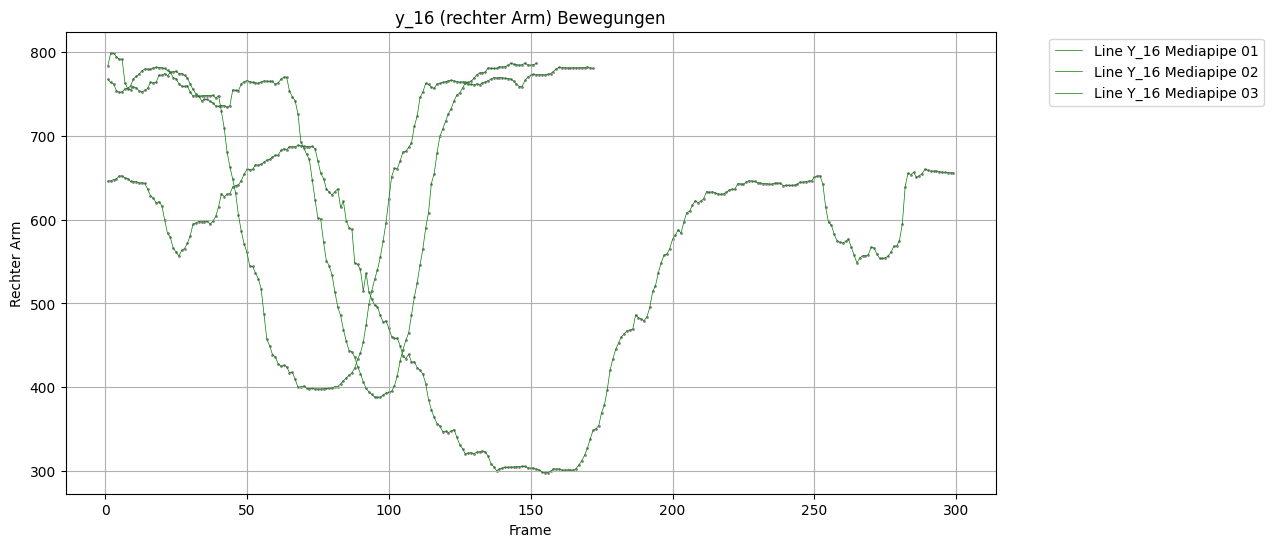

In [36]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP1["frame"], df_MediaP1["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP1["frame"], df_MediaP1["y_16"], color='green', linestyle='-', linewidth=0.5, label='Line Y_16 Mediapipe 01')

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP2["frame"], df_MediaP2["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP2["frame"], df_MediaP2["y_16"], color='green', linestyle='-', linewidth=0.5, label='Line Y_16 Mediapipe 02')

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP3["frame"], df_MediaP3["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP3["frame"], df_MediaP3["y_16"], color='green', linestyle='-', linewidth=0.5, label='Line Y_16 Mediapipe 03')


plt.title("y_16 (rechter Arm) Bewegungen")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Berechnung des Mean

In [37]:
# Calculate the mean for the specified columns in each DataFrame in dfs
meansMP = []

df_MediaP12 = pd.concat([df_MediaP1, df_MediaP2])

mean_values_MP = df_MediaP12[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
meansMP.append(mean_values_MP)
    
print(mean_values_MP)

               x_0         y_0         z_0         x_1         y_1   
frame                                                                
1      1000.349765  294.664795 -533.418385  1019.51065  267.872025  \
2      1000.374220  295.854285 -502.280515  1019.61930  268.535925   
3      1000.039700  297.303150 -478.263080  1019.29025  269.782850   
4      1000.605655  298.085755 -382.511795  1020.12695  270.494000   
5      1001.033670  299.330585 -347.574245  1020.83852  271.757680   
...            ...         ...         ...         ...         ...   
295    1027.297200  275.345830 -393.954650  1045.02340  246.833790   
296    1026.098400  275.387400 -395.694600  1044.01050  246.866550   
297    1025.321700  275.448640 -396.025540  1043.26810  247.222380   
298    1025.112300  275.464050 -394.841580  1042.95850  247.527250   
299    1024.545900  275.633200 -387.090800  1042.58740  247.968230   

              z_1         x_2         y_2         z_2          x_3  ...   
frame         

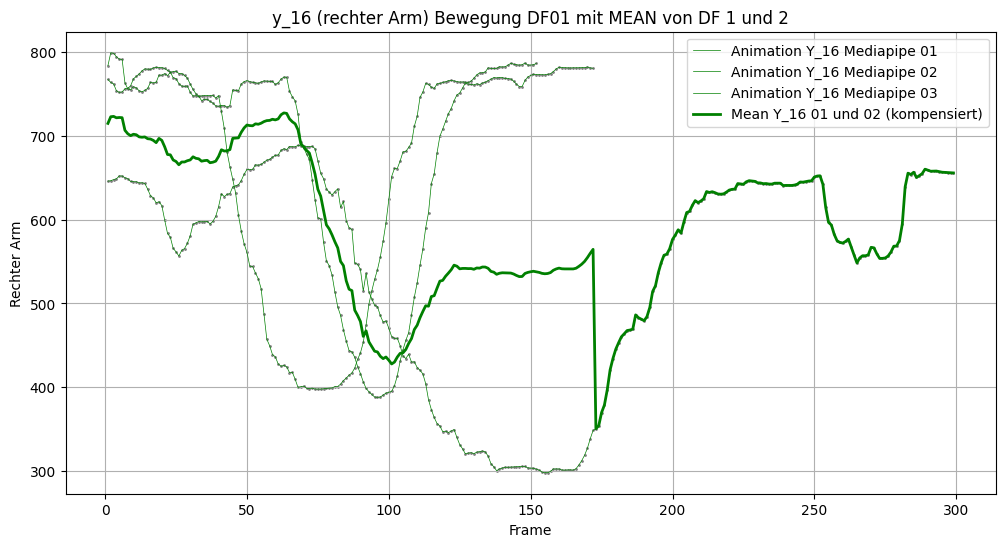

In [126]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP1["frame"], df_MediaP1["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP1["frame"], df_MediaP1["y_16"], color='green', linestyle='-', linewidth=0.5, label='Animation Y_16 Mediapipe 01')

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP2["frame"], df_MediaP2["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP2["frame"], df_MediaP2["y_16"], color='green', linestyle='-', linewidth=0.5, label='Animation Y_16 Mediapipe 02')

# Plot the values of "xLeftArm" against "frame" as dots
plt.scatter(df_MediaP3["frame"], df_MediaP3["y_16"], marker='o', color='gray', s=1)
# Plot the line connecting the data points
plt.plot(df_MediaP3["frame"], df_MediaP3["y_16"], color='green', linestyle='-', linewidth=0.5, label='Animation Y_16 Mediapipe 03')


# Plot the mean values per frame
plt.plot(mean_values_MP.index, mean_values_MP["y_16"], color='green', linestyle='-', linewidth=2, label='Mean Y_16 01 und 02 (kompensiert)')

plt.title("y_16 (rechter Arm) Bewegung DF01 mit MEAN von DF 1 und 2")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Berechnung Euclidean Distances

# Analyse der MEAN Werte

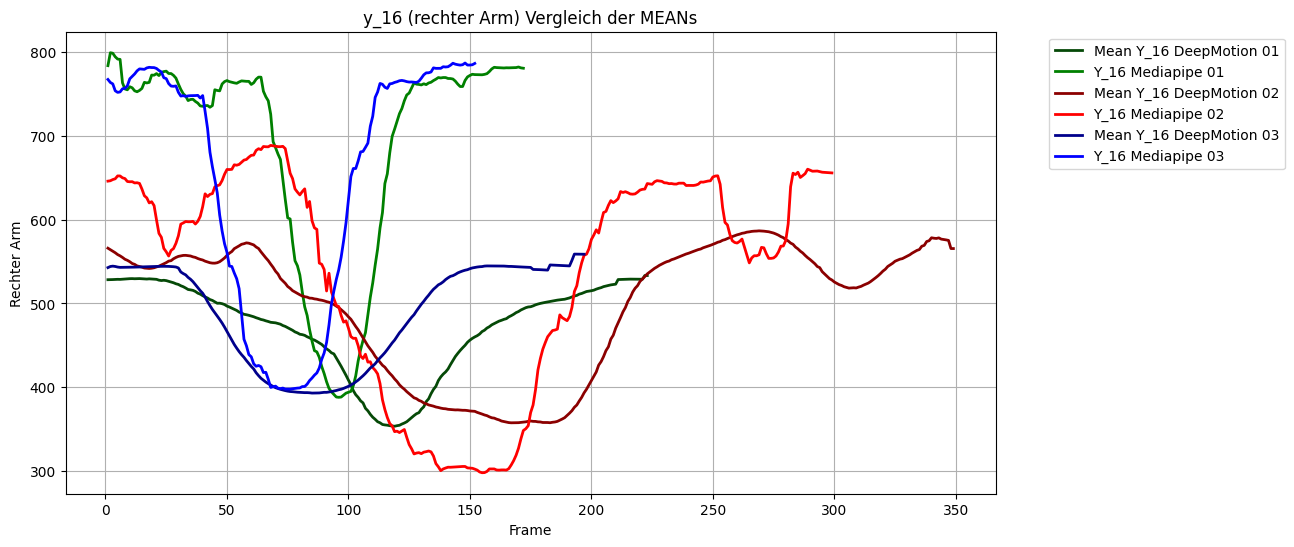

In [127]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='#054907', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 01')
plt.plot(df_MediaP1["frame"], df_MediaP1["y_16"], color='green', linestyle='-', linewidth=2, label='Y_16 Mediapipe 01')

plt.plot(mean_values_02.index, mean_values_02["y_16"], color='darkred', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 02')
plt.plot(df_MediaP2["frame"], df_MediaP2["y_16"], color='red', linestyle='-', linewidth=2, label='Y_16 Mediapipe 02')

plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 03')
plt.plot(df_MediaP3["frame"], df_MediaP3["y_16"], color='blue', linestyle='-', linewidth=2, label='Y_16 Mediapipe 03')

plt.title("y_16 (rechter Arm) Vergleich der MEANs")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [130]:
difference_in_mean_01 = df_MediaP1['y_16'].mean() - mean_values_01['y_16'].mean()
difference_in_mean_02 = df_MediaP2['y_16'].mean() - mean_values_02['y_16'].mean()
difference_in_mean_03 = df_MediaP3['y_16'].mean() - mean_values_03['y_16'].mean()

difference_in_mean_01_per = difference_in_mean_01 / df_MediaP1['y_16'].mean() * 100
difference_in_mean_02_per = difference_in_mean_02 / df_MediaP2['y_16'].mean() * 100
difference_in_mean_03_per = difference_in_mean_03 / df_MediaP3['y_16'].mean() * 100

print(f"Mean Value in DeepMotion 01: {mean_values_01['y_16'].mean()}")
print(f"Mean Value in MediaPipe 01: {df_MediaP1['y_16'].mean()}")
print(f"Difference in Mean: {difference_in_mean_01}")
print(f"Difference in Mean in Percentage: {difference_in_mean_01_per}")
print("")
print(f"Mean Value in DeepMotion 02: {mean_values_02['y_16'].mean()}")
print(f"Mean Value in MediaPipe 02: {df_MediaP2['y_16'].mean()}")
print(f"Difference in Mean: {difference_in_mean_02}")
print(f"Difference in Mean in Percentage: {difference_in_mean_02_per}")
print("")
print(f"Mean Value in DeepMotion 03: {mean_values_03['y_16'].mean()}")
print(f"Mean Value in MediaPipe 03: {df_MediaP3['y_16'].mean()}")
print(f"Difference in Mean: {difference_in_mean_03}")
print(f"Difference in Mean in Percentage: {difference_in_mean_03_per}")

Mean Value in DeepMotion 01: 472.65750183856505
Mean Value in MediaPipe 01: 689.4409321511629
Difference in Mean: 216.78343031259783
Difference in Mean in Percentage: 31.443365225821424

Mean Value in DeepMotion 02: 498.36329765998096
Mean Value in MediaPipe 02: 538.5593431438126
Difference in Mean: 40.196045483831654
Difference in Mean in Percentage: 7.463624203265938

Mean Value in DeepMotion 03: 489.16153426395937
Mean Value in MediaPipe 03: 649.9219472368421
Difference in Mean: 160.76041297288276
Difference in Mean in Percentage: 24.735341475443214


## Vergleich 1:1
Werte von 1 Original MediaPipe Frame zu 1 Animationsclip DeepMotion

Der aus dem Video erstellten Datenpunkte wurden 1:1 mit dem daraus erstellten Animationsclip in DeepMotion erstellt.

Es wird der X-Wert des Kopfs (X_0) analsiert.

### Kompensiert 01

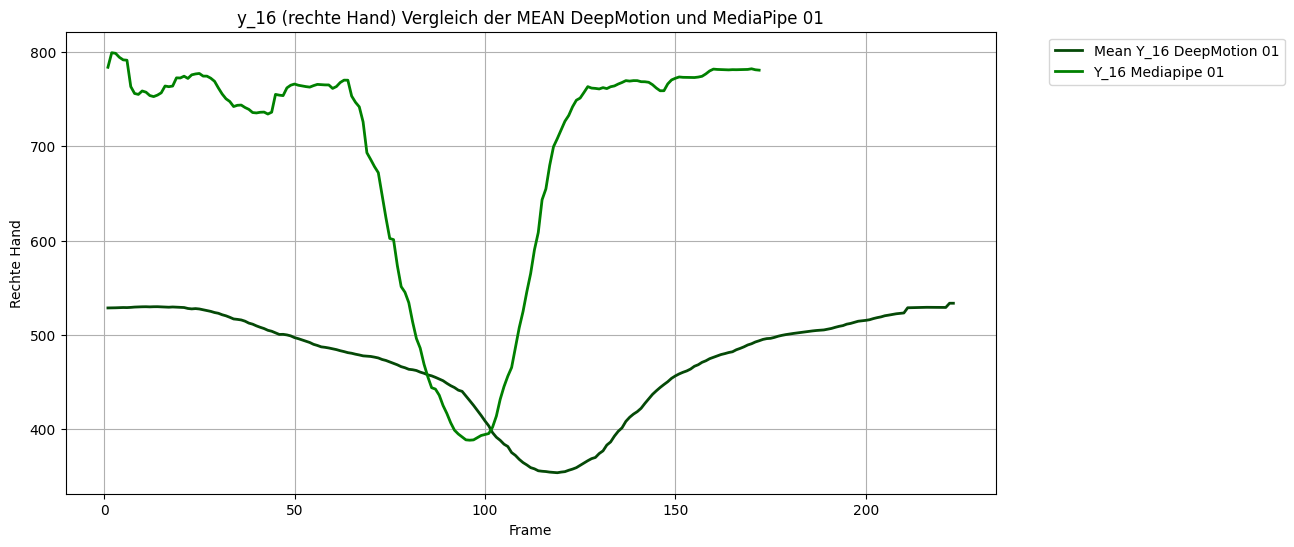

In [131]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='#054907', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 01')
plt.plot(df_MediaP1["frame"], df_MediaP1["y_16"], color='green', linestyle='-', linewidth=2, label='Y_16 Mediapipe 01')

plt.title("y_16 (rechte Hand) Vergleich MEAN DeepMotion und MediaPipe 01")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
df_deepM01.head(5)

path  frame  compensation   
0  /Users/salomekoller/Library/CloudStorage/OneDr...      1             1  \
1  /Users/salomekoller/Library/CloudStorage/OneDr...      2             1   
2  /Users/salomekoller/Library/CloudStorage/OneDr...      3             1   
3  /Users/salomekoller/Library/CloudStorage/OneDr...      4             1   
4  /Users/salomekoller/Library/CloudStorage/OneDr...      5             1   

        x_0       y_0       z_0  x_1  y_1  z_1  x_2  ...  z_29  x_30  y_30   
0  1007.957  310.4770  48.49379    0    0    0    0  ...     0     0     0  \
1  1009.866  310.3577  46.83622    0    0    0    0  ...     0     0     0   
2  1010.789  310.2786  45.84492    0    0    0    0  ...     0     0     0   
3  1011.705  310.2040  44.86193    0    0    0    0  ...     0     0     0   
4  1013.273  310.1202  43.07705    0    0    0    0  ...     0     0     0   

   z_30      x_31      y_31      z_31      x_32      y_32      z_32  
0     0  1072.200  1100.625 -47.00967  990.2646  1100.683 -46.87774  
1     0  1072.243  1100.843 -47.14393  990.2909  1100.901 -47.10284  
2     0  1072.243  1100.958 -46.99820  990.3058  1101.013 -47.12606  
3     0  1072.248  1101.064 -46.89816  990.3204  1101.111 -47.27299  
4     0  1072.656  1101.187 -47.29828  990.7258  1101.205 -48.28540  

[5 rows x 102 columns]

### Euclidean Distances

In [44]:
# Define the columns for which you want to calculate the Euclidean distances
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Calculate the Euclidean distances grouped by 'frame'
euclidean_distances_01 = {}

# Iterate over each frame and calculate the Euclidean distance for each column
for frame in df_MediaP1["frame"]:
    euclidean_distances_01[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_01[col].loc[frame])
        point_2 = (frame, df_MediaP1[col][df_MediaP1['frame'] == frame].values[0])
        euclidean_distance_01 = distance.euclidean(point_1, point_2)
        euclidean_distances_01[frame].append(euclidean_distance_01)

# Convert the dictionary to a DataFrame
euclidean_df_01 = pd.DataFrame.from_dict(euclidean_distances_01, orient='index', columns=columns[1:])

print(euclidean_df_01)

           x_0      y_0         z_0     x_11       y_11        z_11   
1     70.61010  5.18919  485.934238  41.6313  101.56143   72.272174  \
2     72.63736  4.52899  422.382814  42.2853  101.29662  145.241531   
3     74.80896  3.72814  339.088138  43.0127  102.66794  175.697903   
4     76.71585  2.93397  131.125848  41.9289  103.01124  314.942968   
5     79.30170  2.66857   27.828886  42.8499  103.55342  416.957318   
..         ...      ...         ...      ...        ...         ...   
168  111.99346  7.70684  630.880838  22.3488  108.86154   27.714660   
169  111.04224  7.42052  612.403448  21.7426  108.46325   34.228288   
170  110.11105  7.67390  605.649836  21.7476  108.67296   32.995218   
171  108.72770  8.18505  604.832072  22.0108  108.26268   28.873232   
172  107.90990  8.40793  600.753374  22.2657  108.05318   29.592782   

          x_12       y_12        z_12     x_13  ...         z_27       x_28   
1    196.52150   86.40727   26.557012  16.8112  ...   275.815060  16

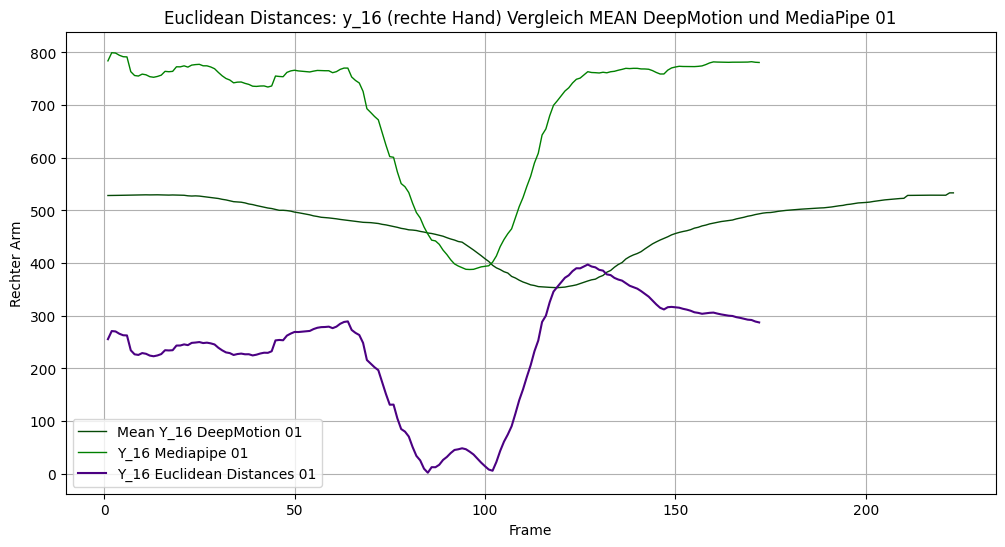

In [134]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='#054907', linestyle='-', linewidth=1, label='Mean Y_16 DeepMotion 01')

# Plot the mean values for Mediapipe 01
plt.plot(df_MediaP1["frame"], df_MediaP1["y_16"], color='green', linestyle='-', linewidth=1, label='Y_16 Mediapipe 01')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_01.index, euclidean_df_01["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Y_16 Euclidean Distances 01')


plt.title("Euclidean Distances: y_16 (rechte Hand) Vergleich MEAN DeepMotion und MediaPipe 01")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(loc='best')
plt.show()

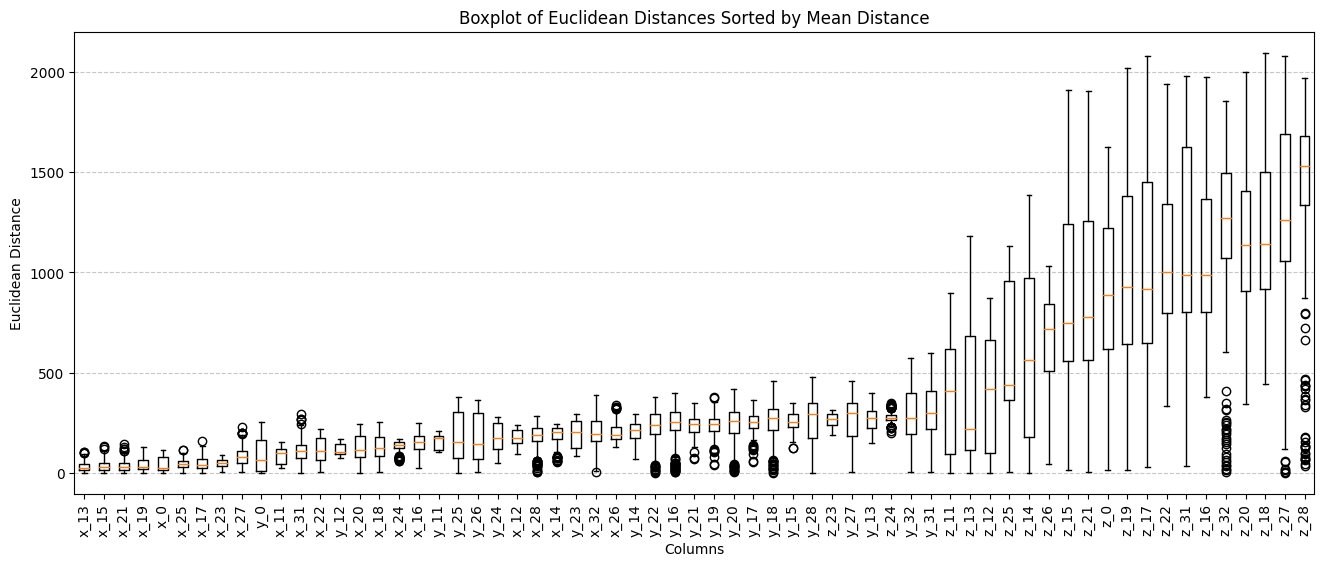

In [46]:
# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_01.mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_01[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance 01')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ohne Z Werte, da diese viel höhere Differenzen haben.

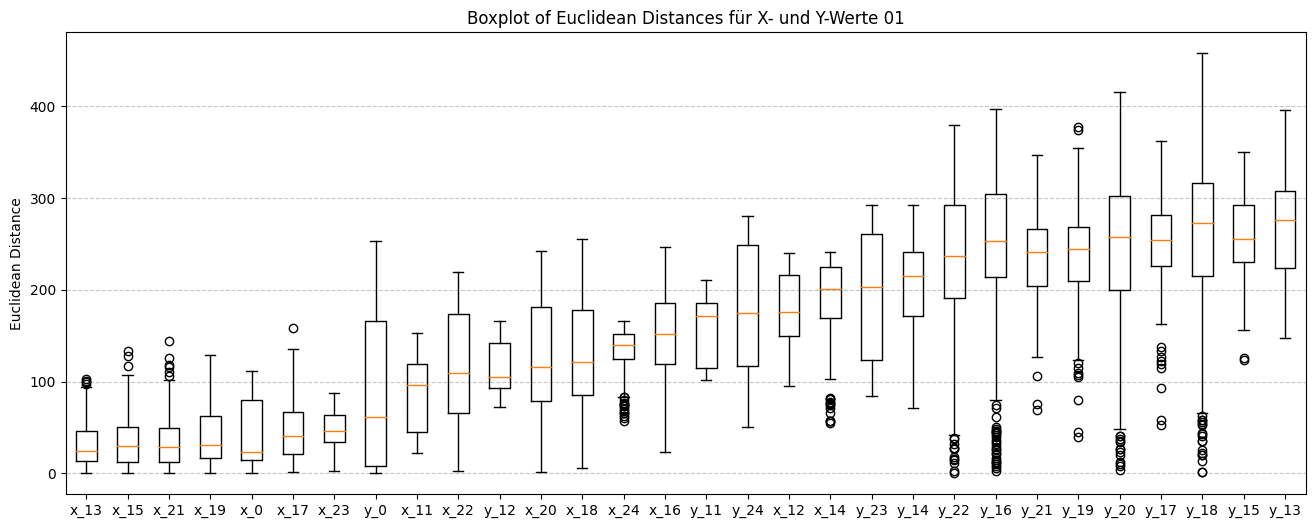

In [106]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_01[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_01[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances für X- und Y-Werte 01')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Kompensiert 02

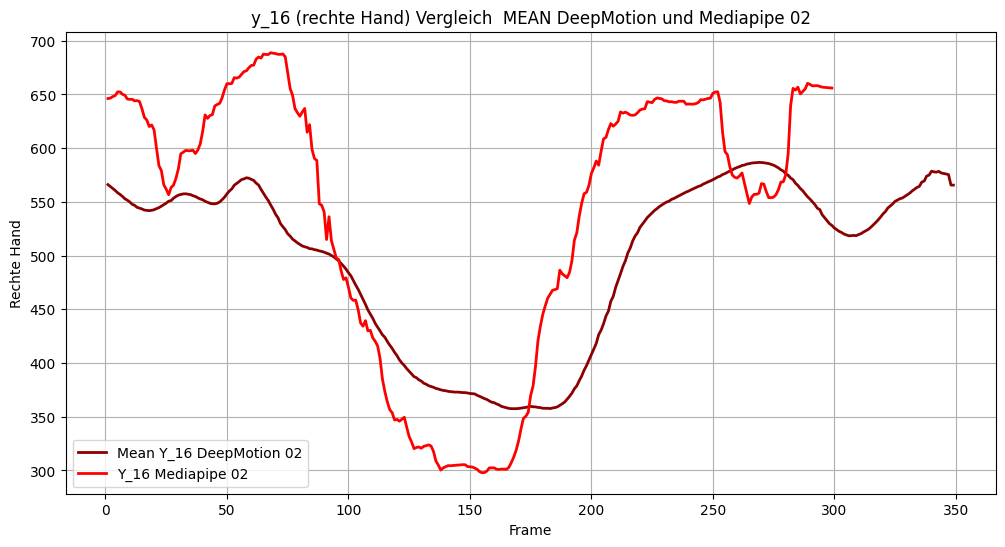

In [135]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_02.index, mean_values_02["y_16"], color='darkred', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 02')
plt.plot(df_MediaP2["frame"], df_MediaP2["y_16"], color='red', linestyle='-', linewidth=2, label='Y_16 Mediapipe 02')

plt.title("y_16 (rechte Hand) Vergleich  MEAN DeepMotion und Mediapipe 02")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend( loc='best')
plt.show()

### Euclidean Distances

In [49]:
# Define the columns for which you want to calculate the Euclidean distances
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Calculate the Euclidean distances grouped by 'frame'
euclidean_distances_02 = {}

# Iterate over each frame and calculate the Euclidean distance for each column
for frame in df_MediaP2["frame"]:
    euclidean_distances_02[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_02[col].loc[frame])
        point_2 = (frame, df_MediaP2[col][df_MediaP2['frame'] == frame].values[0])
        euclidean_distance_02 = distance.euclidean(point_1, point_2)
        euclidean_distances_02[frame].append(euclidean_distance_02)

# Convert the dictionary to a DataFrame
euclidean_df_02 = pd.DataFrame.from_dict(euclidean_distances_02, orient='index', columns=columns[1:])

print(euclidean_df_02)

           x_0       y_0         z_0       x_11      y_11        z_11   
1     55.19967  48.41670  379.871946  178.89074  35.94892  130.021914  \
2     52.63816  46.87482  383.557962  176.69496  35.88432  139.184568   
3     50.10822  44.72776  421.635378  174.52424  34.38999  127.008720   
4     48.88784  44.18150  441.181184  172.01796  32.22724  108.861705   
5     47.45342  42.33998  478.305860  169.97140  30.03930   87.465356   
..         ...       ...         ...        ...       ...         ...   
295  156.08492  92.13263  490.915818  274.97840   2.87623   24.030748   
296  153.14596  89.02246  483.528350  273.13486   6.71501   23.519066   
297  150.50170  85.67180  472.580992  271.02598  10.27284   32.584029   
298  147.86664  82.07495  459.270826  268.37948  12.79947   42.810280   
299  145.95462  79.75314  443.600016  266.94756  14.93150   48.647330   

         x_12      y_12        z_12       x_13  ...       z_27       x_28   
1    58.74262   1.45233  120.639234  125.67760

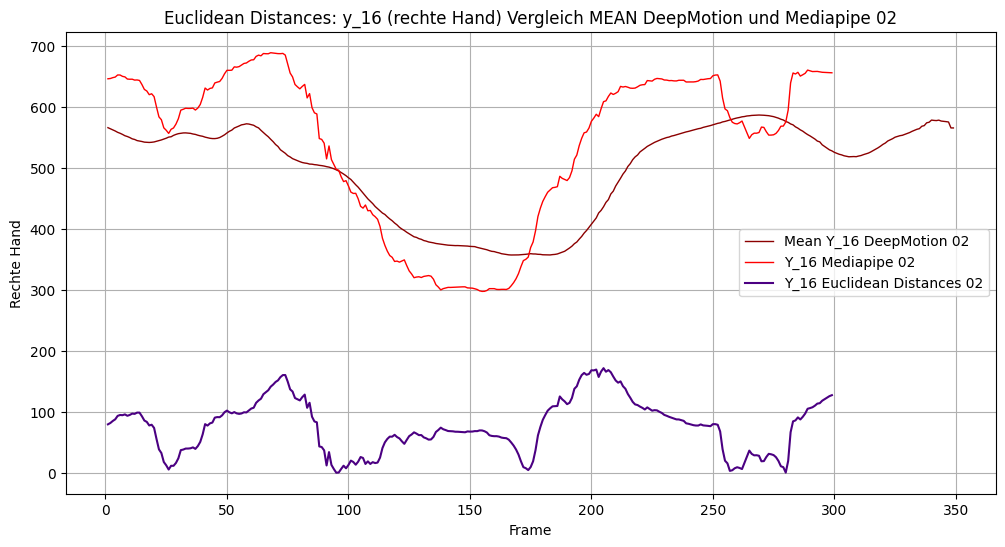

In [145]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_02.index, mean_values_02["y_16"], color='darkred', linestyle='-', linewidth=1, label='Mean Y_16 DeepMotion 02')

# Plot the mean values for Mediapipe 01
plt.plot(df_MediaP2["frame"], df_MediaP2["y_16"], color='red', linestyle='-', linewidth=1, label='Y_16 Mediapipe 02')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_02.index, euclidean_df_02["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Y_16 Euclidean Distances 02')


plt.title("Euclidean Distances: y_16 (rechte Hand) Vergleich MEAN DeepMotion und Mediapipe 02")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend( loc='best')
plt.show()

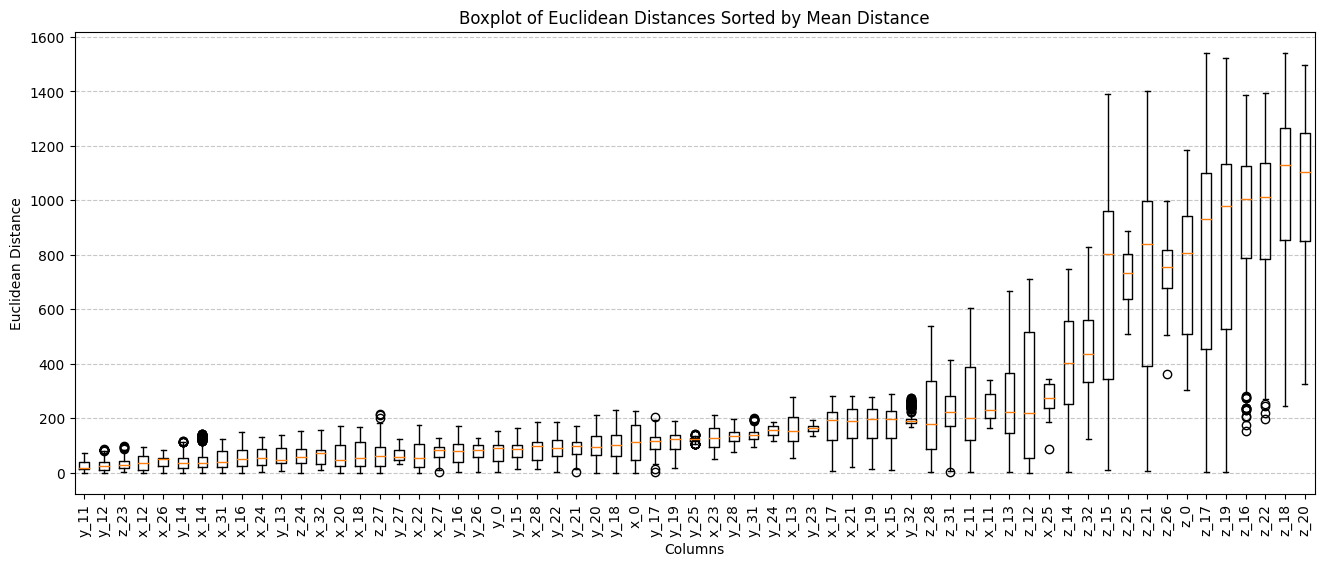

In [51]:
# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_02.mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_02[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance 02')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ohne Z Werte

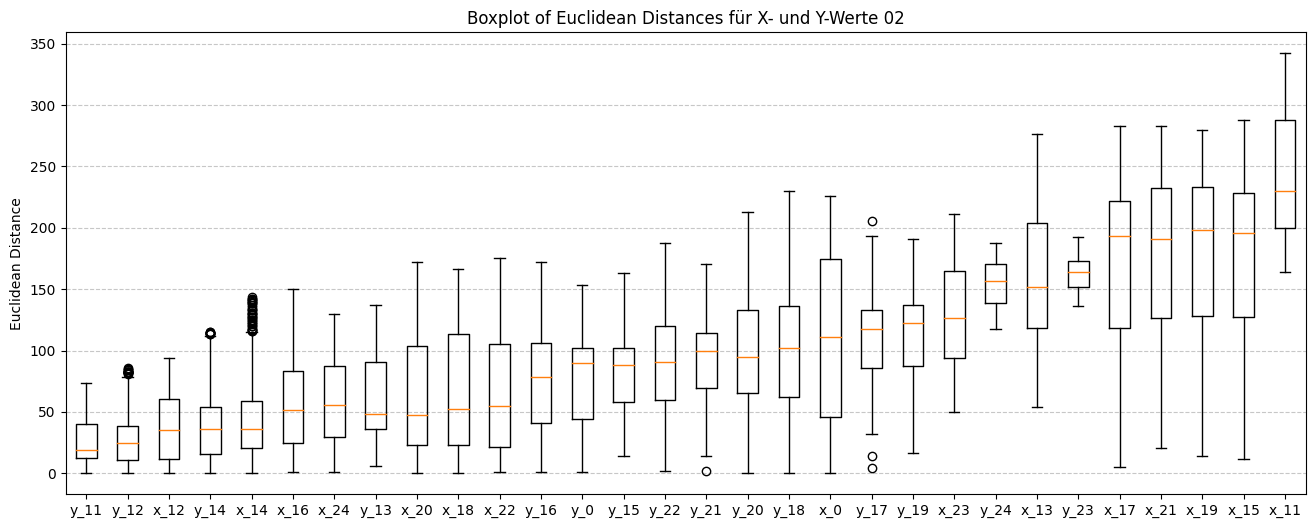

In [91]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_02[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_02[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances für X- und Y-Werte 02')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nicht Kompensiert 03

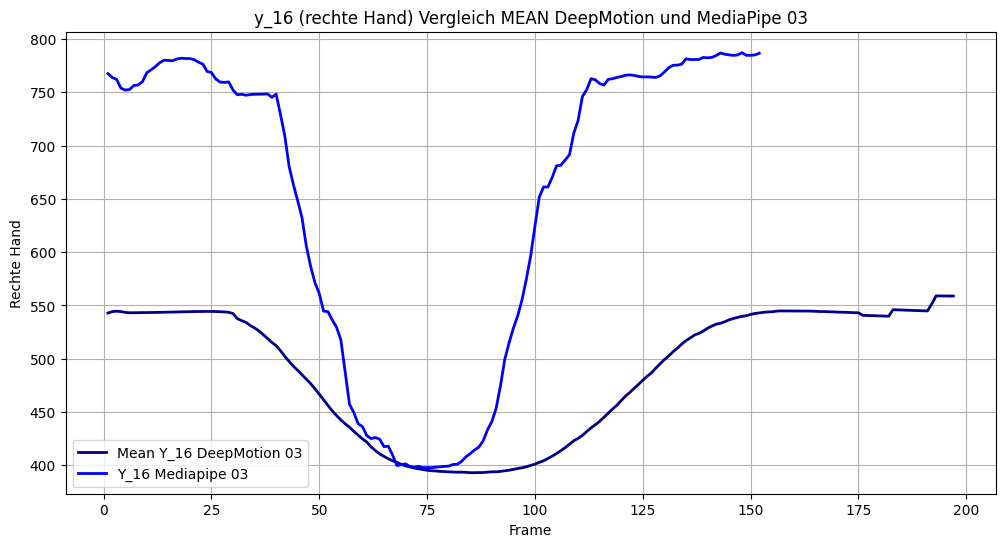

In [138]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=2, label='Mean Y_16 DeepMotion 03')
plt.plot(df_MediaP3["frame"], df_MediaP3["y_16"], color='blue', linestyle='-', linewidth=2, label='Y_16 Mediapipe 03')

plt.title("y_16 (rechte Hand) Vergleich MEAN DeepMotion und MediaPipe 03")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Euclidean Distances

In [54]:
# Define the columns for which you want to calculate the Euclidean distances
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Calculate the Euclidean distances grouped by 'frame'
euclidean_distances_03 = {}

# Iterate over each frame and calculate the Euclidean distance for each column
for frame in df_MediaP3["frame"]:
    euclidean_distances_03[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_03[col].loc[frame])
        point_2 = (frame, df_MediaP3[col][df_MediaP3['frame'] == frame].values[0])
        euclidean_distance_03 = distance.euclidean(point_1, point_2)
        euclidean_distances_03[frame].append(euclidean_distance_03)

# Convert the dictionary to a DataFrame
euclidean_df_03 = pd.DataFrame.from_dict(euclidean_distances_03, orient='index', columns=columns[1:])

print(euclidean_df_03)

          x_0       y_0         z_0     x_11      y_11        z_11       x_12   
1    63.06876  32.11092  342.826724  52.5687  86.09668  154.469104  202.37722  \
2    64.55996  33.63290  644.302376  51.8262  81.41155   83.107388  203.15843   
3    65.85464  33.94282  635.778966  51.4533  79.56873   79.340686  204.24762   
4    67.61884  33.76542  516.516946  52.2935  79.51154   23.553904  205.51108   
5    68.46610  33.15117  489.480596  52.5196  79.73991    5.446198  206.52363   
..        ...       ...         ...      ...       ...         ...        ...   
148  46.87916  32.52454  860.248182  76.2065  86.24915  189.938682  194.08744   
149  46.47678  32.62010  873.191332  77.0083  86.07778  192.218944  193.61772   
150  45.99782  32.83864  884.807724  77.7023  85.65972  206.404008  193.03852   
151  46.09537  32.96212  853.414222  77.9274  85.46878  181.767586  192.78324   
152  46.41528  33.00810  842.995963  77.8593  85.25476  170.142346  192.86956   

         y_12        z_12  

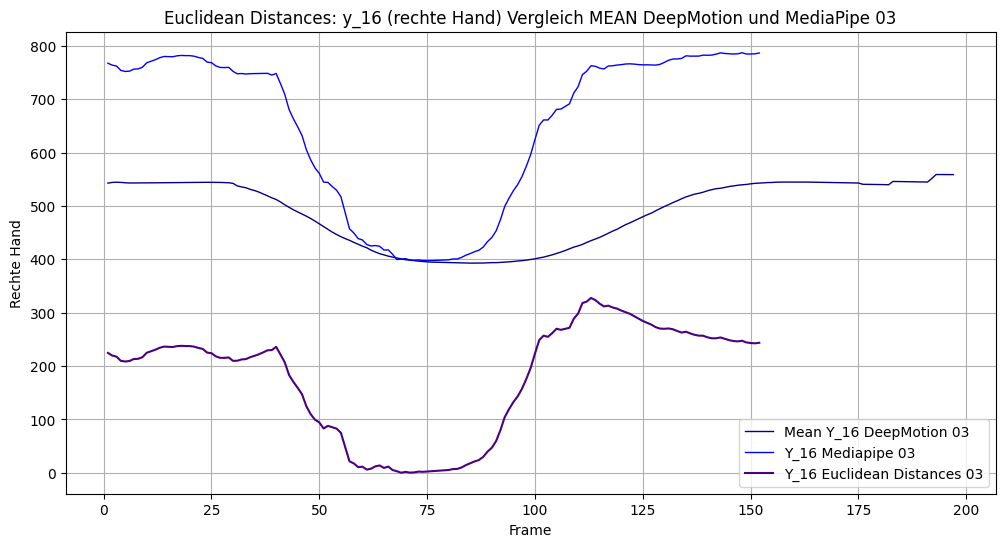

In [148]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=1, label='Mean Y_16 DeepMotion 03')

# Plot the mean values for Mediapipe 01
plt.plot(df_MediaP3["frame"], df_MediaP3["y_16"], color='blue', linestyle='-', linewidth=1, label='Y_16 Mediapipe 03')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Y_16 Euclidean Distances 03')


plt.title("Euclidean Distances: y_16 (rechte Hand) Vergleich MEAN DeepMotion und MediaPipe 03")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

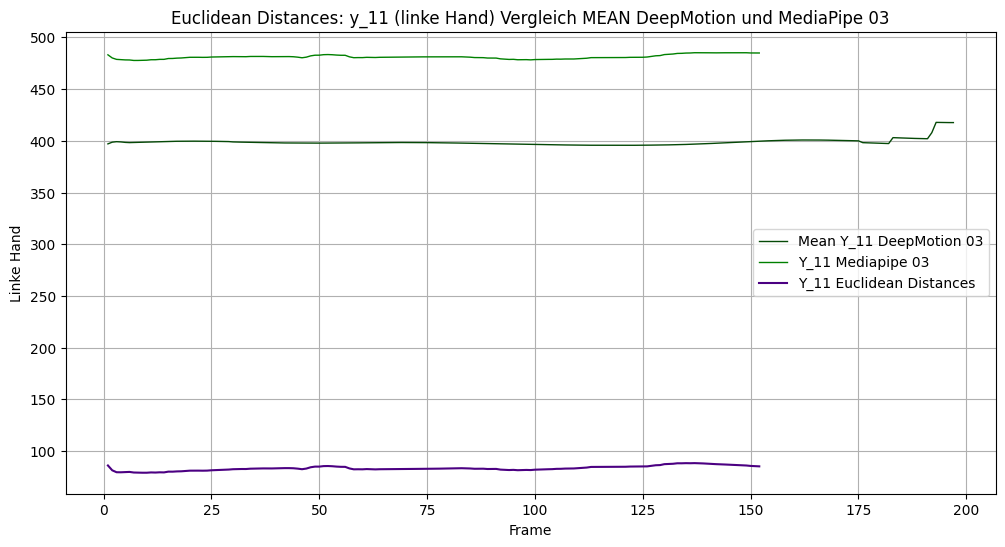

In [143]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_11"], color='#054907', linestyle='-', linewidth=1, label='Mean Y_11 DeepMotion 03')

# Plot the mean values for Mediapipe 01
plt.plot(df_MediaP3["frame"], df_MediaP3["y_11"], color='green', linestyle='-', linewidth=1, label='Y_11 Mediapipe 03')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_11"], color='indigo', linestyle='-', linewidth=1.5, label='Y_11 Euclidean Distances')


plt.title("Euclidean Distances: y_11 (linke Hand) Vergleich MEAN DeepMotion und MediaPipe 03")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

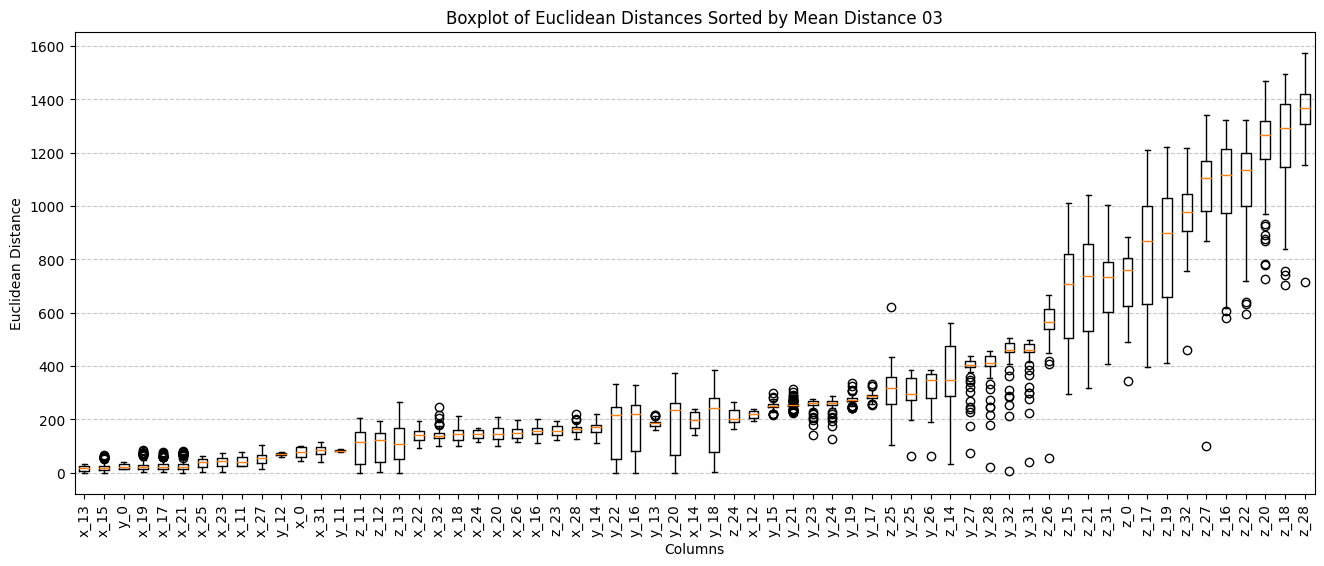

In [144]:
# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03.mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance 03')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ohne Z Werte

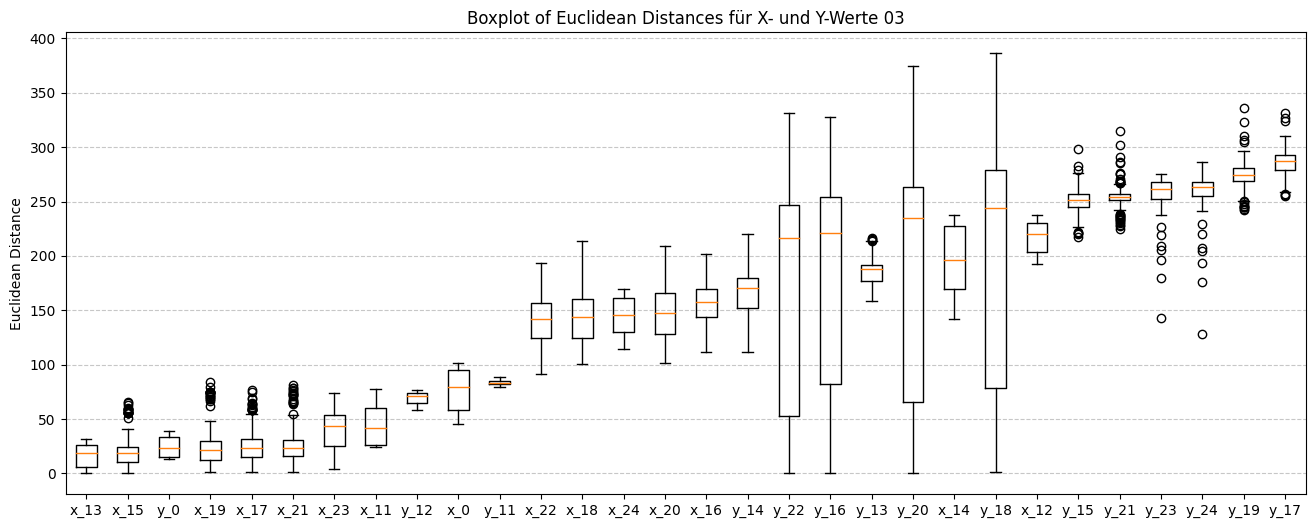

In [107]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances für X- und Y-Werte 03')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Schlussfolgerung

- ** Trinkarm ist viel genauer **
- ** Videoaufnahmen: Arm ist wegen Shirt nicht ersichtlich **
- ** Videoaufnahmen: Beine in Sitzposition können irritieren durch Tisch **
- ** Z Werte können nicht verwendet werden für Analyse Performance **
- ** Nicht Kompensierte Bewegung hat viel kleinere Ranges von Differenzen weil Bewegung sehr klar ist **

In [59]:
## Ganzer Oberkörper bestimmen, wie gross der Unterschied ist

## Vergleich ganzer Oberkörper

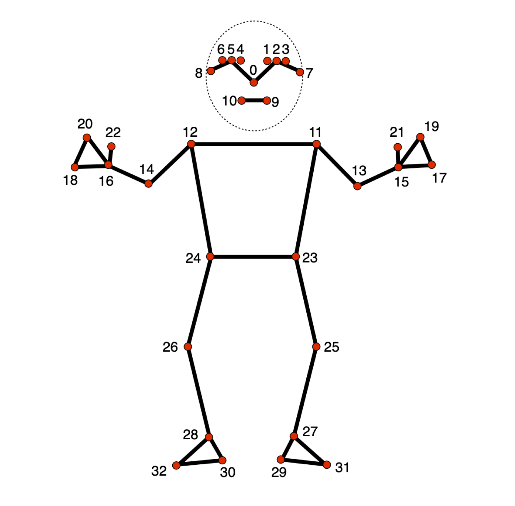

In [60]:
# Inserting an image
img = plt.imread('Pictures/landmark.png')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

Erklärung, dass Nummer 13, 15 und 17 sehr schlecht sind

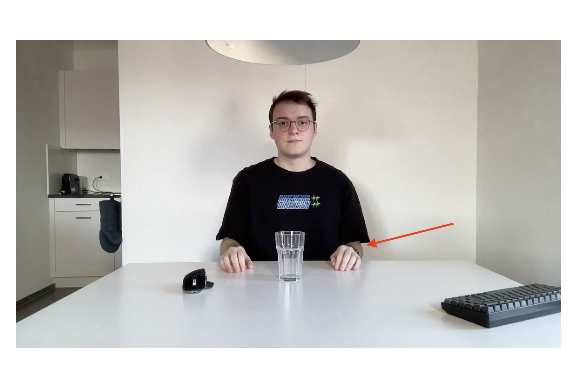

In [61]:
# Inserting an image
img = plt.imread('Pictures/ausgangsposition.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

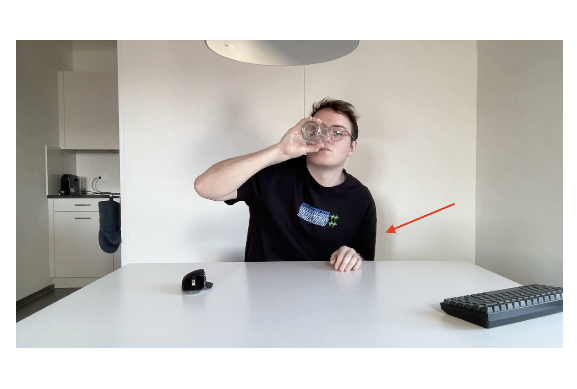

In [62]:
# Inserting an image
img = plt.imread('Pictures/bewegung.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

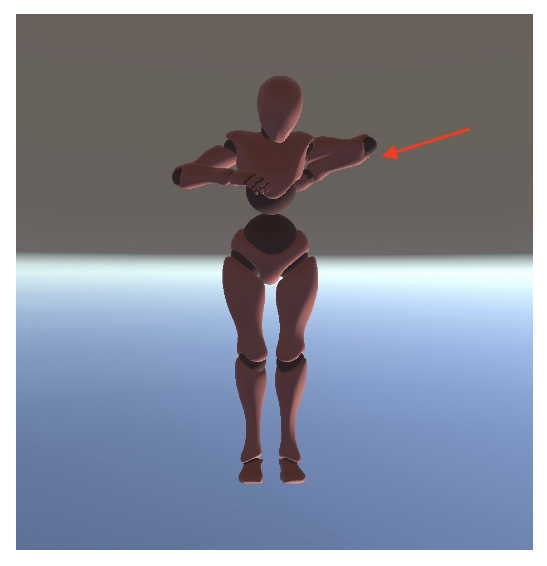

In [63]:
# Inserting an image
img = plt.imread('Pictures/komp_1.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.4)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

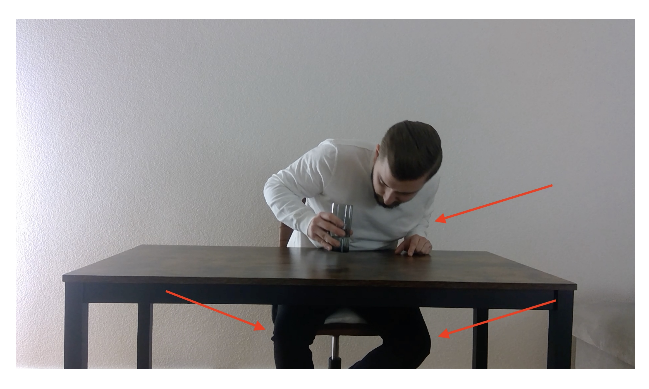

In [64]:
# Inserting an image
img = plt.imread('Pictures/komp2.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

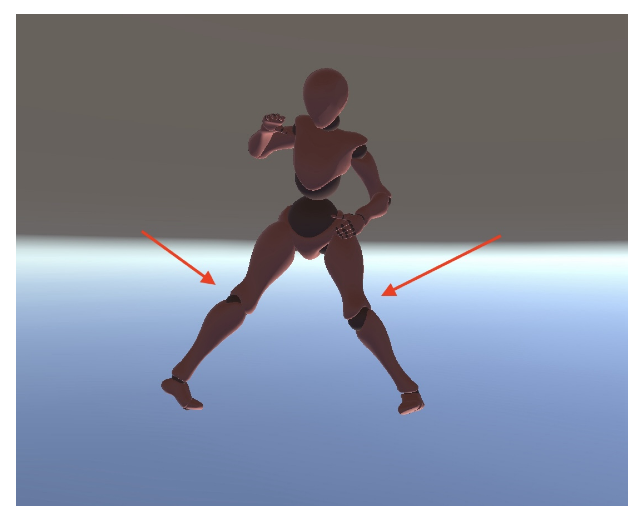

In [65]:
# Inserting an image
img = plt.imread('Pictures/x_2.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.4)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

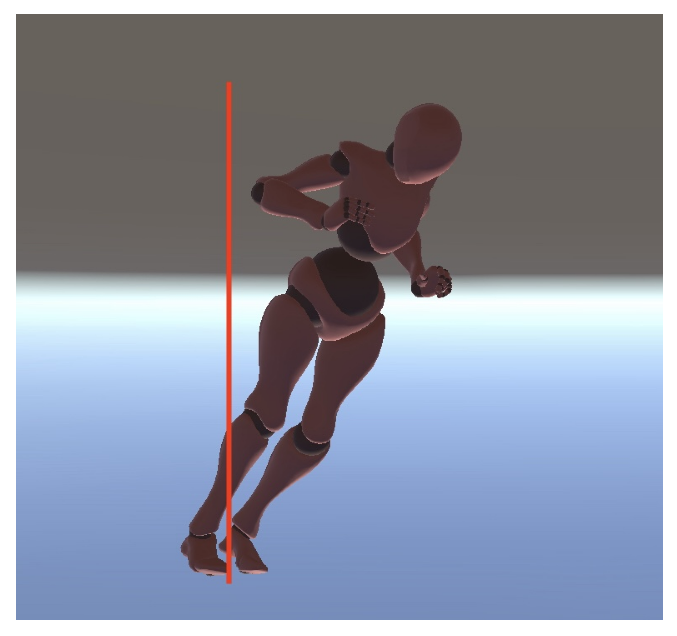

In [66]:
# Inserting an image
img = plt.imread('Pictures/x_3.jpg')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.6)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

# Difference in Mean Upper Body

### Kompensation 01

In [67]:
selected_columns = ['x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
                    'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 
                    'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                    'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 
                    'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                    'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 
                    'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                    'x_24', 'y_24', 'z_24']

difference_in_mean_upper_body_01 = df_MediaP1[selected_columns].mean() - mean_values_01[selected_columns].mean()

print(f"Mean Value in DeepMotion 01: {difference_in_mean_upper_body_01}")

Mean Value in DeepMotion 01: x_0      -31.005383
y_0       85.109544
z_0     -897.008328
x_11      89.108724
y_11     157.811382
z_11    -311.970889
x_12    -177.360285
y_12     116.187851
z_12    -311.492140
x_13     -15.727805
y_13     268.901008
z_13    -333.054192
x_14    -189.918670
y_14     195.132118
z_14    -552.661658
x_15      -5.890643
y_15     257.393067
z_15    -778.335689
x_16    -141.133033
y_16     216.783430
z_16   -1075.709669
x_17     -10.936398
y_17     249.789076
z_17    -897.428122
x_18    -122.603284
y_18     223.617478
z_18   -1210.960187
x_19      -4.052926
y_19     237.846164
z_19    -888.631738
x_20    -114.874810
y_20     212.010494
z_20   -1165.640071
x_21     -15.834412
y_21     234.519081
z_21    -786.015872
x_22    -103.837372
y_22     200.004883
z_22   -1068.992045
x_23     -47.571097
y_23     195.008068
z_23     271.237545
x_24    -133.489564
y_24     176.186785
z_24     283.673128
dtype: float64


In [68]:
selected_columns_X = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24']

selected_columns_Y = ['y_0', 'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

selected_columns_Z = ['z_0', 'z_11', 'z_12', 'z_13', 
                    'z_14', 'z_15', 'z_16', 'z_17', 
                    'z_18', 'z_19', 'z_20', 'z_21', 
                    'z_22', 'z_23', 'z_24']

difference_in_mean_upper_body_01_X = difference_in_mean_upper_body_01[selected_columns_X]
difference_in_mean_upper_body_01_Y = difference_in_mean_upper_body_01[selected_columns_Y]
difference_in_mean_upper_body_01_Z = difference_in_mean_upper_body_01[selected_columns_Z]

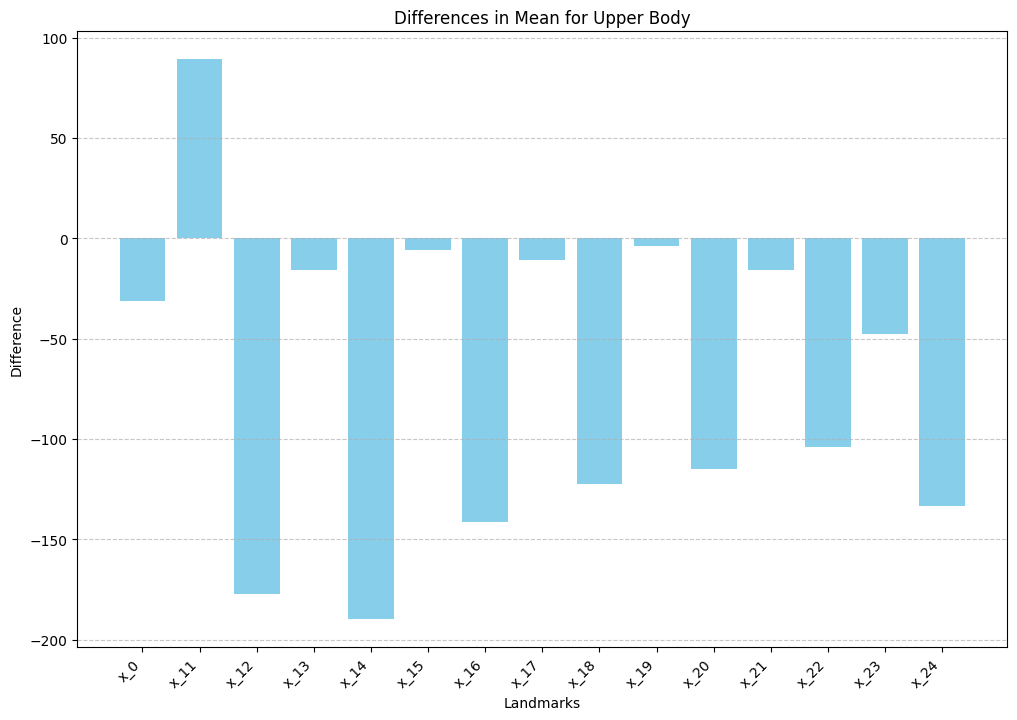

In [69]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_X.index, difference_in_mean_upper_body_01_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


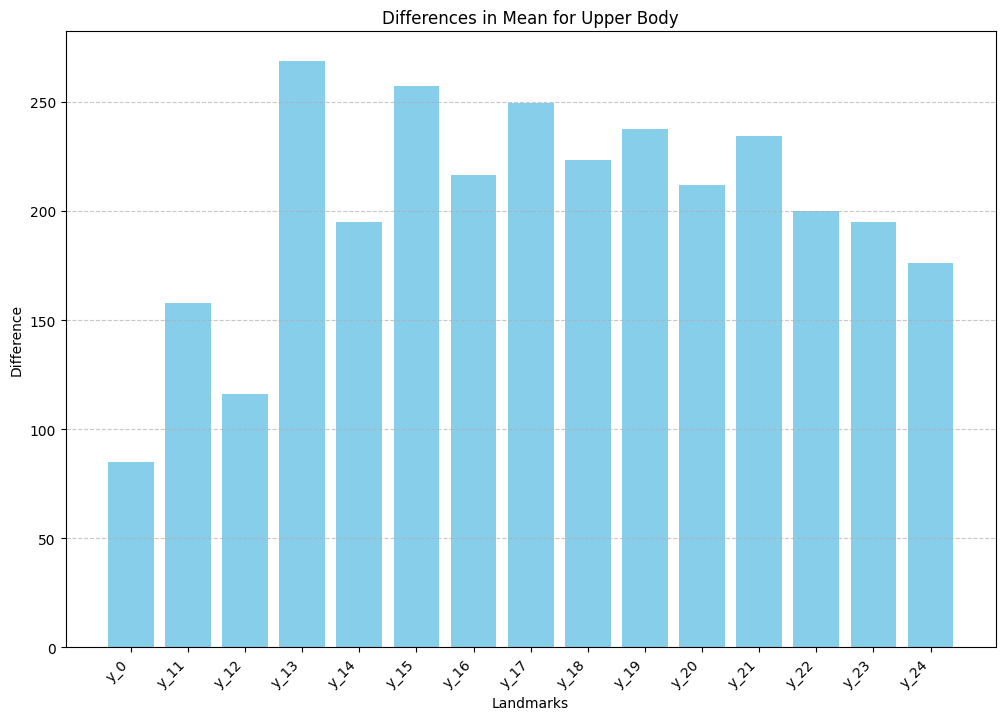

In [70]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Y.index, difference_in_mean_upper_body_01_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

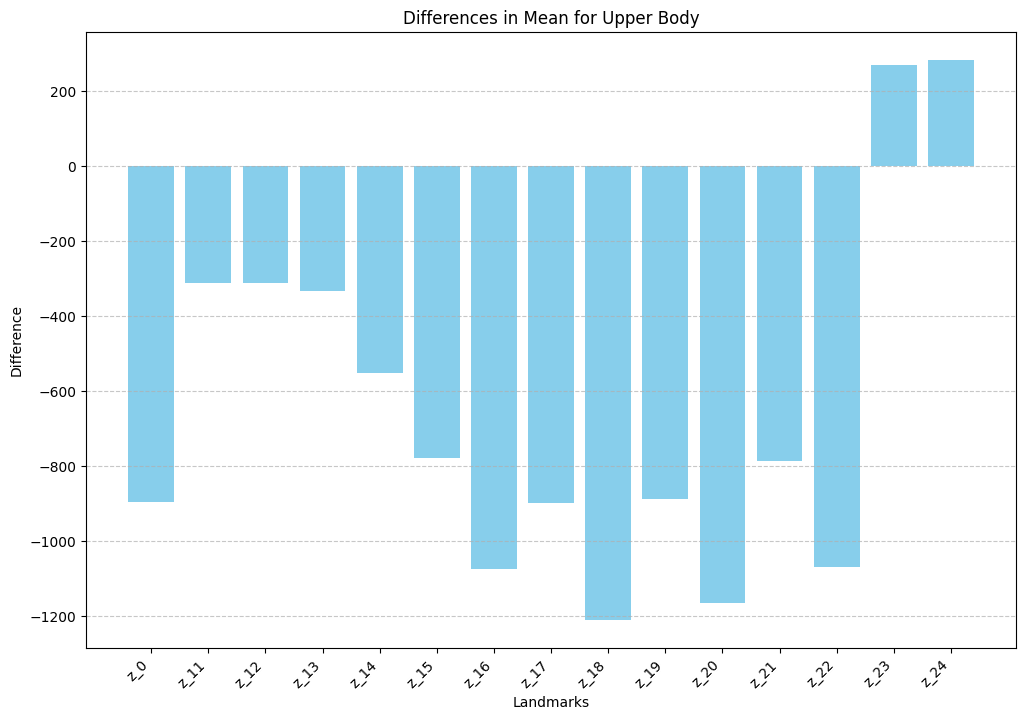

In [71]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Z.index, difference_in_mean_upper_body_01_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Kompensation 02

In [72]:
difference_in_mean_upper_body_02 = df_MediaP2[selected_columns].mean() - mean_values_02[selected_columns].mean()
print(f"Mean Value in DeepMotion 02: {difference_in_mean_upper_body_02}")

Mean Value in DeepMotion 02: x_0      125.592045
y_0        5.806375
z_0     -709.984031
x_11     257.943581
y_11      21.903230
z_11    -197.445841
x_12      20.898190
y_12     -24.200553
z_12    -219.813500
x_13     172.017453
y_13      63.045117
z_13    -167.355125
x_14      39.763185
y_14      34.751363
z_14    -349.765201
x_15     197.468727
y_15      86.963725
z_15    -667.397397
x_16      55.231697
y_16      40.196045
z_16    -900.711777
x_17     187.062917
y_17     115.959927
z_17    -778.841716
x_18      66.977964
y_18      63.291284
z_18   -1016.748973
x_19     196.945729
y_19     118.269049
z_19    -823.906667
x_20      67.182740
y_20      59.797667
z_20   -1018.569246
x_21     195.843908
y_21      96.717420
z_21    -702.464440
x_22      72.050818
y_22      43.654418
z_22    -916.627207
x_23     142.140468
y_23     164.436047
z_23      46.979843
x_24      66.245460
y_24     156.731623
z_24      -1.508389
dtype: float64


In [73]:
difference_in_mean_upper_body_02_X = difference_in_mean_upper_body_02[selected_columns_X]
difference_in_mean_upper_body_02_Y = difference_in_mean_upper_body_02[selected_columns_Y]
difference_in_mean_upper_body_02_Z = difference_in_mean_upper_body_02[selected_columns_Z]

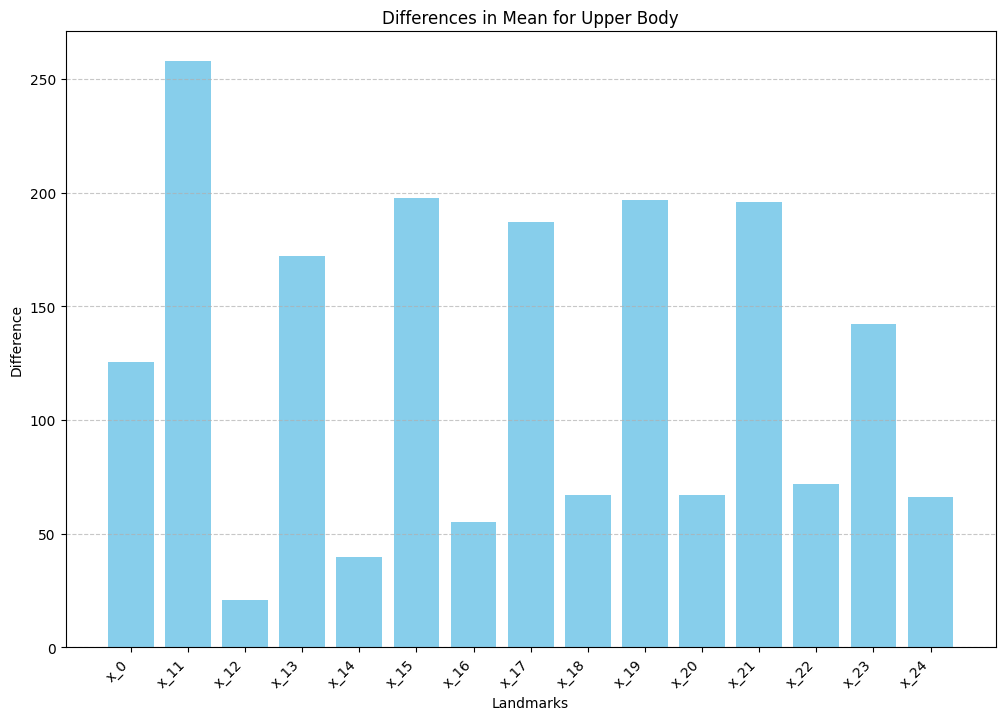

In [74]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_02_X.index, difference_in_mean_upper_body_02_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

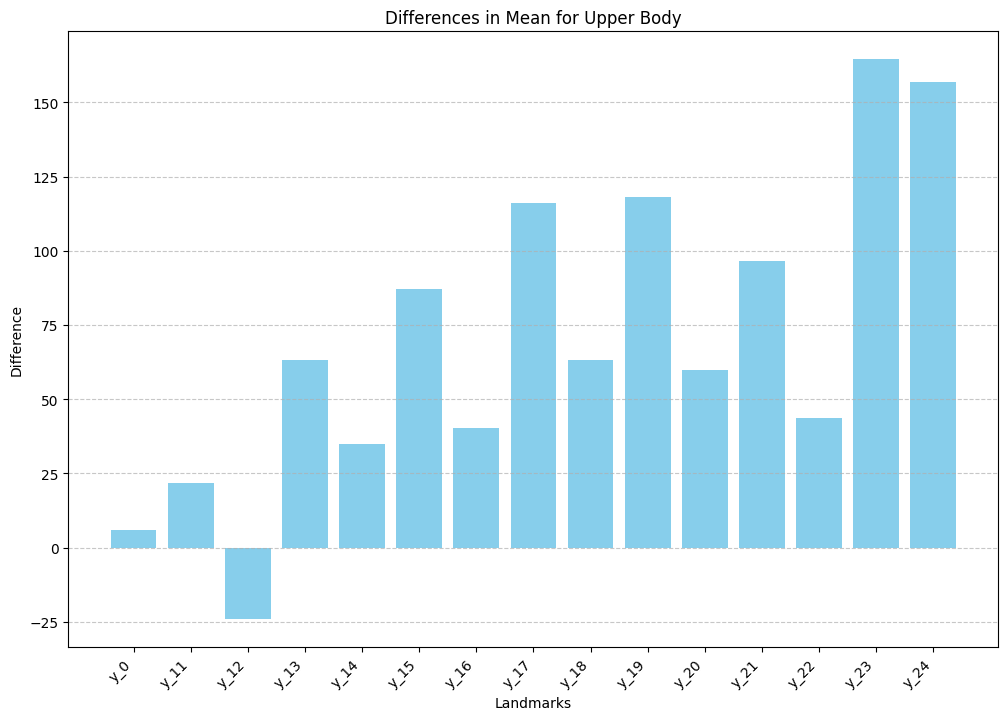

In [75]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_02_Y.index, difference_in_mean_upper_body_02_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

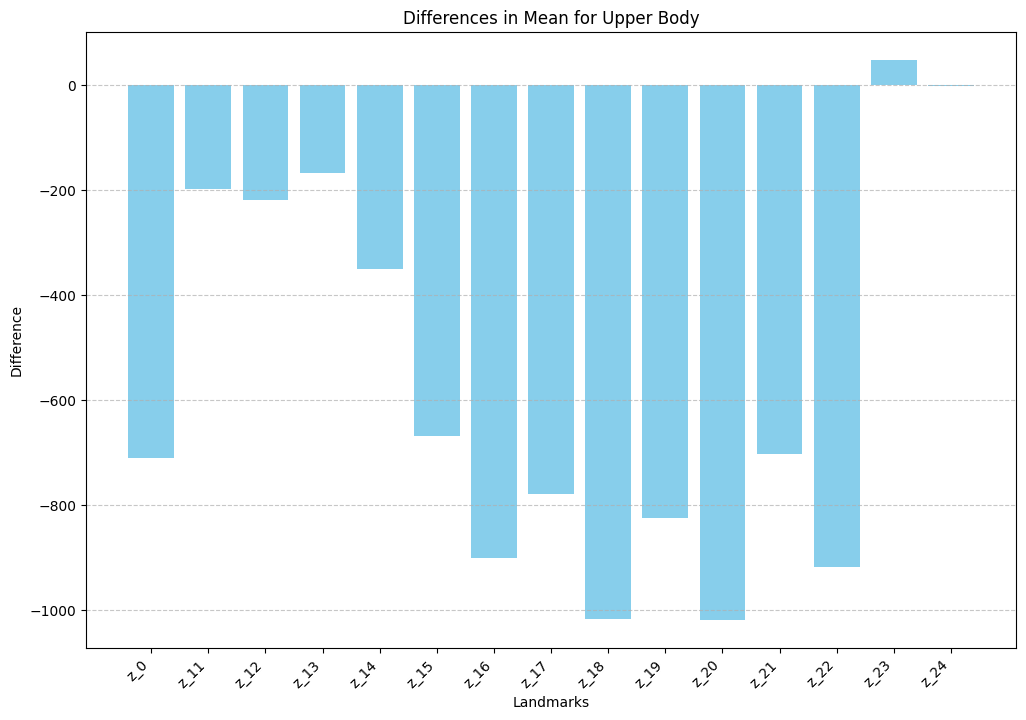

In [76]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_02_Z.index, difference_in_mean_upper_body_02_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nicht Kompensiert 03

In [77]:
difference_in_mean_upper_body_03 = df_MediaP3[selected_columns].mean() - mean_values_03[selected_columns].mean()
print(f"Mean Value in DeepMotion 03: {difference_in_mean_upper_body_03}")

Mean Value in DeepMotion 03: x_0      -76.802632
y_0      -26.716661
z_0     -729.781071
x_11      43.883409
y_11      82.325016
z_11     -92.398095
x_12    -216.977443
y_12      68.090590
z_12     -86.453354
x_13     -10.940060
y_13     185.931603
z_13    -103.176975
x_14    -196.027993
y_14     162.710472
z_14    -368.355056
x_15     -10.010956
y_15     251.423262
z_15    -671.931933
x_16    -146.682576
y_16     160.760413
z_16   -1095.501765
x_17     -13.711416
y_17     285.014607
z_17    -824.306416
x_18    -131.497891
y_18     174.647835
z_18   -1263.698338
x_19     -16.580489
y_19     272.902936
z_19    -850.155784
x_20    -135.120269
y_20     162.673778
z_20   -1247.040533
x_21     -22.083199
y_21     254.289996
z_21    -701.347837
x_22    -131.311169
y_22     144.029174
z_22   -1106.562379
x_23     -39.271264
y_23     257.066895
z_23     153.513654
x_24    -144.584407
y_24     259.562145
z_24     207.209277
dtype: float64


In [78]:
difference_in_mean_upper_body_03_X = difference_in_mean_upper_body_03[selected_columns_X]
difference_in_mean_upper_body_03_Y = difference_in_mean_upper_body_03[selected_columns_Y]
difference_in_mean_upper_body_03_Z = difference_in_mean_upper_body_03[selected_columns_Z]

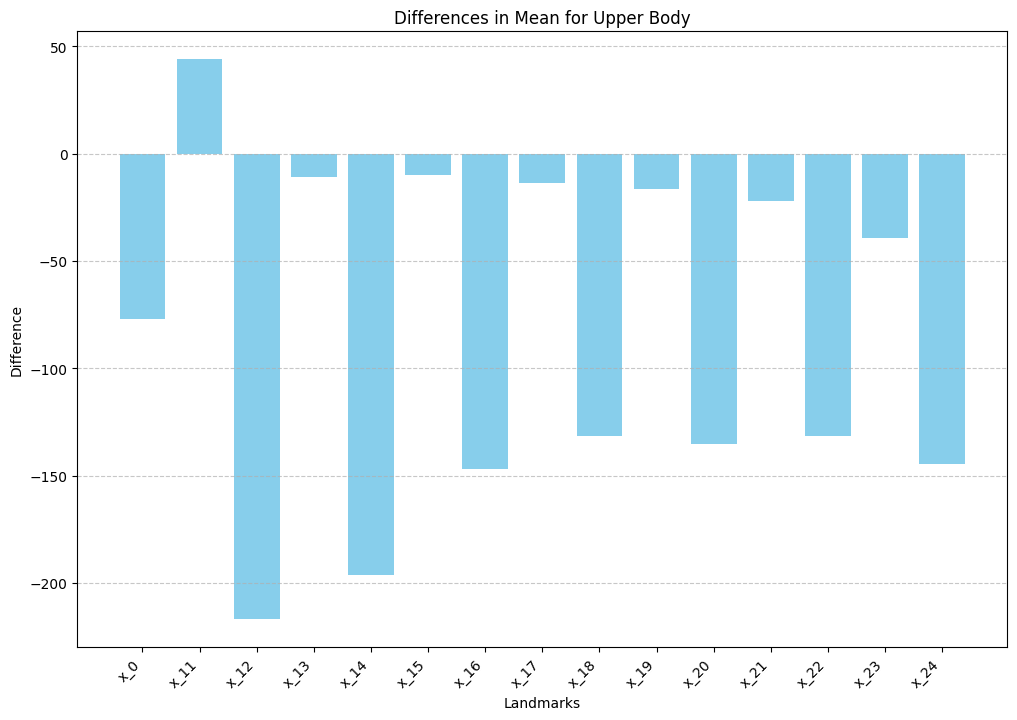

In [79]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_03_X.index, difference_in_mean_upper_body_03_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

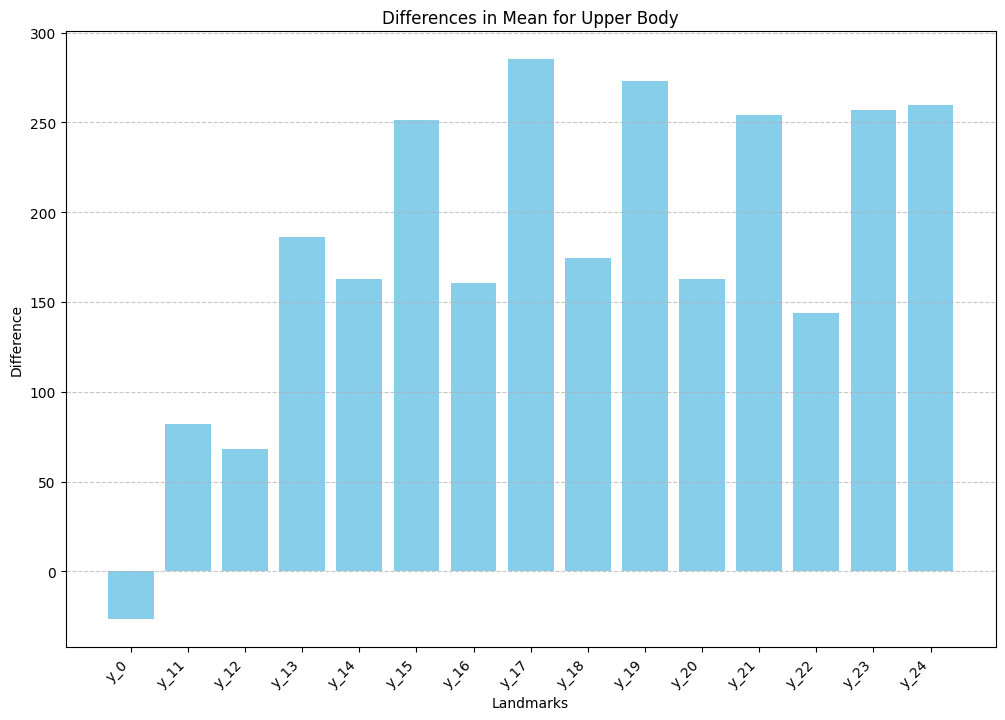

In [80]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_03_Y.index, difference_in_mean_upper_body_03_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

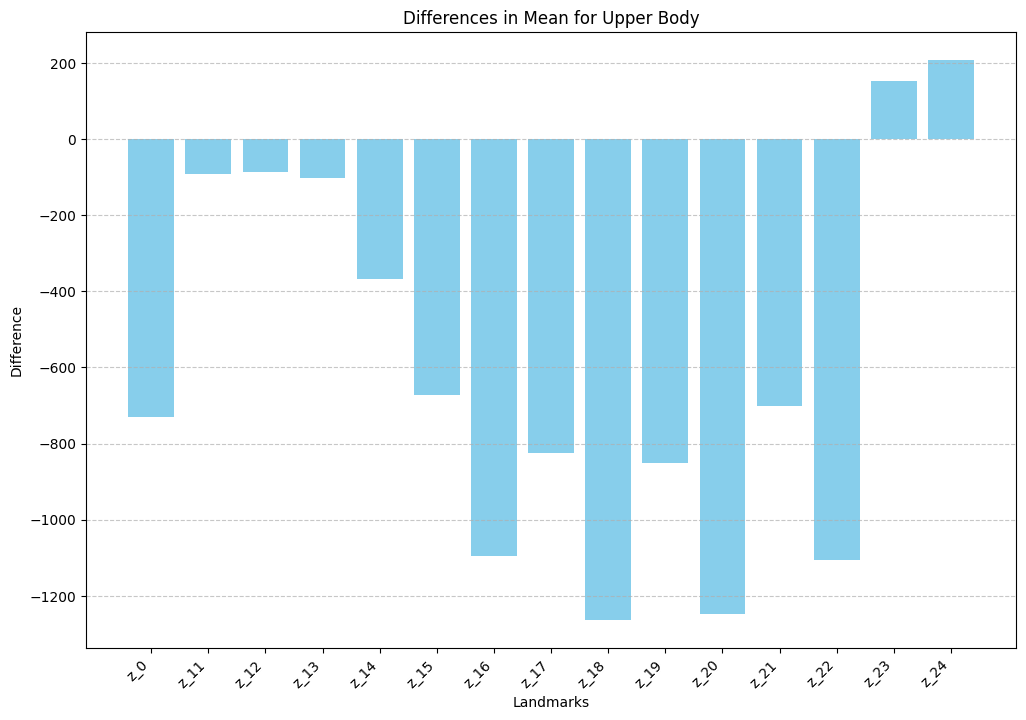

In [81]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_03_Z.index, difference_in_mean_upper_body_03_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()